This is an auto-generated notebook

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [3]:
df = pd.read_csv("batchUdacity_TOTAL.csv")
df.drop(["Unnamed: 0", "matchId", "completed"], axis=1, inplace=True)
df.fillna(-1, inplace=True)
print(df.head(), df.shape)

   activityDurationSeconds  assists  averageKillDistance  averageScorePerKill  \
0                      753      6.0            12.450000           192.000000   
1                      753      5.0             3.190476           176.904762   
2                      753      8.0             9.562500           212.812500   
3                      753      5.0             9.000000           193.333333   
4                      753      4.0             8.857143           192.500000   

   averageScorePerLife  combatRating  deaths  kills  killsDeathsAssists  \
0           240.000000         120.0    15.0   20.0            1.533333   
1           195.526316         116.0    18.0   21.0            1.305556   
2           212.812500         106.0    15.0   16.0            1.333333   
3           138.095238          91.0    20.0   15.0            0.875000   
4           149.722222          84.0    17.0   14.0            0.941176   

   killsDeathsRatio   score  standing  team  weaponKillsHeavy 

In [28]:
df.describe()

,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
count,2.424921e+06,2.424921e+06,2.339500e+06,2.329253e+06,2.424921e+06,2.332404e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06
mean,5.909254e+02,4.037157e+00,1.602713e+01,2.050391e+02,1.945159e+02,1.325562e+02,1.085623e+01,1.077756e+01,1.387487e+00,1.177244e+00,2.274101e+03,5.088252e-01,1.649993e+01,3.176161e-01,3.118327e+00,3.633675e+00,1.739322e+00
std,1.195260e+02,2.913969e+00,8.849550e+00,2.480350e+02,3.006944e+02,1.170303e+02,4.932818e+00,6.342052e+00,1.298535e+00,1.176640e+00,3.098258e+03,4.999222e-01,5.000001e-01,9.206479e-01,2.787253e+00,3.338469e+00,2.750705e+00
min,5.400000e+01,0.000000e+00,2.500000e-01,5.000000e-02,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.230000e+02,2.000000e+00,1.016667e+01,1.234211e+02,5.078947e+01,7.200000e+01,7.000000e+00,6.000000e+00,7.380952e-01,5.882353e-01,4.850000e+02,0.000000e+00,1.600000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,5.960000e+02,4.000000e+00,1.450000e+01,1.866667e+02,1.350000e+02,1.010000e+02,1.100000e+01,1.000000e+01,1.115385e+00,9.333333e-01,1.765000e+03,1.000000e+00,1.600000e+01,0.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00
75%,6.670000e+02,6.000000e+00,2.000000e+01,2.303846e+02,2.292105e+02,1.400000e+02,1.500000e+01,1.500000e+01,1.642857e+00,1.400000e+00,2.980000e+03,1.000000e+00,1.700000e+01,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00
max,2.508000e+03,3.000000e+01,1.980000e+02,9.265000e+03,2.460000e+04,2.034000e+03,5.300000e+01,5.800000e+01,4.350000e+01,4.200000e+01,5.310000e+04,1.000000e+00,1.700000e+01,2.500000e+01,3.600000e+01,3.800000e+01,3.500000e+01


In [6]:
normalize(df).describe()

,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
count,2.424921e+06,2.424921e+06,2.339500e+06,2.329253e+06,2.424921e+06,2.332404e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06
mean,2.187960e-01,1.345719e-01,7.978323e-02,2.212523e-02,7.907152e-03,6.562958e-02,2.048345e-01,1.858199e-01,3.189626e-02,2.802963e-02,4.282677e-02,5.088252e-01,4.999334e-01,1.270464e-02,8.662019e-02,9.562302e-02,4.969491e-02
std,4.870662e-02,9.713231e-02,4.475120e-02,2.677132e-02,1.222335e-02,5.750875e-02,9.307205e-02,1.093457e-01,2.985138e-02,2.801525e-02,5.834761e-02,4.999222e-01,5.000001e-01,3.682591e-02,7.742369e-02,8.785444e-02,7.859158e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.911165e-01,6.666667e-02,5.014749e-02,1.331589e-02,2.064613e-03,3.587224e-02,1.320755e-01,1.034483e-01,1.696771e-02,1.400560e-02,9.133710e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.777778e-02,2.631579e-02,0.000000e+00
50%,2.208639e-01,1.333333e-01,7.206068e-02,2.014222e-02,5.487805e-03,5.012285e-02,2.075472e-01,1.724138e-01,2.564103e-02,2.222222e-02,3.323917e-02,1.000000e+00,0.000000e+00,0.000000e+00,8.333333e-02,7.894737e-02,0.000000e+00
75%,2.497963e-01,2.000000e-01,9.987358e-02,2.486086e-02,9.317501e-03,6.928747e-02,2.830189e-01,2.586207e-01,3.776683e-02,3.333333e-02,5.612053e-02,1.000000e+00,1.000000e+00,0.000000e+00,1.388889e-01,1.315789e-01,8.571429e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
feature = "combatRating"
# TODO: Calculate Q1 (25th percentile of the data) for the given feature
Q1 = np.percentile(df[feature], 10)

# TODO: Calculate Q3 (75th percentile of the data) for the given feature
Q3 = np.percentile(df[feature], 90)

# TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = (Q3 - Q1)*(1.5)

print(Q1, Q3, step, " for features --", feature)

35.0 225.0 285.0  for features -- combatRating


In [5]:
from IPython.display import display # Allows the use of display() for DataFrames

In [6]:
# Display the outliers
outliers = []


for feature in df.columns:
    
    # TODO: Calculate Q1 (10th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], 10)

    # TODO: Calculate Q3 (90th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], 90)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*(1.5)
    
    print(Q1, Q3, step, " for features --", feature)   
    
    print("Data points considered outliers for the feature, ", feature)
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    outliers.append(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index.values)
    
#print(outliers)
for arrays, names in zip(outliers, df.columns):
    print(names, len(arrays))

443.0 733.0 435.0  for features -- activityDurationSeconds
Data points considered outliers for the feature,  activityDurationSeconds


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
34998,1201,3.0,34.000000,0.416667,0.357143,373.0,13.0,12.0,1.038462,0.923077,5.0,0.0,17,0.0,3.0,3.0,0.0
34999,1201,4.0,26.142857,0.714286,0.714286,375.0,6.0,7.0,1.500000,1.166667,5.0,0.0,17,0.0,1.0,5.0,0.0
35000,1201,0.0,30.545455,0.454545,0.833333,375.0,5.0,11.0,2.200000,2.200000,5.0,0.0,17,0.0,5.0,1.0,0.0
35001,1201,3.0,45.357143,0.214286,0.272727,225.0,10.0,14.0,1.550000,1.400000,3.0,1.0,16,0.0,0.0,8.0,0.0
35002,1201,1.0,111.000000,3.000000,0.250000,225.0,11.0,1.0,0.136364,0.090909,3.0,1.0,16,0.0,0.0,0.0,0.0
35003,1201,2.0,28.333333,0.333333,0.300000,225.0,9.0,9.0,1.111111,1.000000,3.0,1.0,16,0.0,3.0,4.0,0.0
381665,1220,0.0,16.666667,0.200000,0.600000,194.0,4.0,15.0,3.750000,3.750000,3.0,0.0,16,0.0,6.0,7.0,0.0
381666,1220,3.0,19.428571,0.428571,0.333333,196.0,8.0,7.0,1.062500,0.875000,3.0,1.0,17,0.0,0.0,4.0,3.0
381667,1220,2.0,45.000000,1.000000,0.375000,195.0,7.0,3.0,0.571429,0.428571,3.0,0.0,16,0.0,2.0,0.0,0.0
381668,1220,1.0,30.500000,0.750000,0.333333,195.0,8.0,4.0,0.562500,0.500000,3.0,1.0,17,0.0,2.0,0.0,0.0


1.0 8.0 10.5  for features -- assists
Data points considered outliers for the feature,  assists


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
1875,640,20.0,15.142857,268.928571,188.250000,120.0,19.0,14.0,1.263158,0.736842,3765.0,0.0,16,2.0,3.0,7.0,0.0
7758,725,21.0,11.285714,313.095238,469.642857,219.0,13.0,21.0,2.423077,1.615385,6575.0,0.0,17,0.0,2.0,12.0,2.0
28046,797,19.0,17.187500,175.937500,201.071429,84.0,13.0,16.0,1.961538,1.230769,2815.0,1.0,17,0.0,0.0,9.0,7.0
28069,806,21.0,21.250000,195.312500,223.214286,101.0,13.0,16.0,2.038462,1.230769,3125.0,0.0,16,0.0,9.0,5.0,0.0
28678,667,19.0,15.888889,1.444444,1.733333,126.0,14.0,18.0,1.964286,1.285714,26.0,0.0,16,0.0,9.0,4.0,0.0
28686,667,22.0,11.250000,2.250000,0.600000,43.0,14.0,4.0,1.071429,0.285714,9.0,0.0,16,0.0,0.0,4.0,0.0
28708,642,19.0,12.384615,1.153846,1.071429,66.0,13.0,13.0,1.730769,1.000000,15.0,1.0,16,0.0,8.0,5.0,0.0
28941,663,19.0,11.384615,1.538462,1.052632,89.0,18.0,13.0,1.250000,0.722222,20.0,0.0,16,0.0,3.0,8.0,0.0
29008,611,20.0,17.277778,0.722222,0.764706,51.0,16.0,18.0,1.750000,1.125000,13.0,1.0,16,0.0,4.0,11.0,1.0
29884,684,21.0,13.166667,1.250000,0.833333,73.0,17.0,12.0,1.323529,0.705882,15.0,1.0,16,0.0,3.0,6.0,1.0


5.81818181818 26.25 30.6477272727  for features -- averageKillDistance
Data points considered outliers for the feature,  averageKillDistance


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
720,509,0.0,63.000000,1.000000,0.111111,100.0,8.0,1.0,0.125000,0.125000,1.0,1.0,17,0.0,0.0,0.0,0.0
1017,419,0.0,57.500000,-1.000000,0.000000,-1.0,9.0,2.0,0.222222,0.222222,0.0,1.0,16,0.0,1.0,0.0,0.0
1326,341,0.0,71.000000,-1.000000,0.000000,-1.0,8.0,1.0,0.125000,0.125000,0.0,1.0,17,0.0,0.0,0.0,0.0
1327,617,3.0,58.000000,5.000000,0.833333,428.0,5.0,1.0,0.500000,0.200000,5.0,0.0,16,0.0,1.0,0.0,0.0
1350,860,4.0,82.285714,199.285714,279.000000,93.0,9.0,14.0,1.777778,1.555556,2790.0,1.0,16,0.0,0.0,2.0,0.0
1357,860,0.0,107.666667,156.666667,470.000000,87.0,0.0,3.0,3.000000,3.000000,470.0,0.0,17,0.0,0.0,0.0,0.0
2547,796,2.0,57.363636,218.181818,240.000000,91.0,9.0,11.0,1.333333,1.222222,2400.0,0.0,16,0.0,2.0,4.0,0.0
2552,796,0.0,73.111111,181.666667,204.375000,62.0,7.0,9.0,1.285714,1.285714,1635.0,1.0,17,0.0,1.0,0.0,0.0
2646,111,0.0,84.000000,-1.000000,0.000000,-1.0,1.0,1.0,1.000000,1.000000,0.0,1.0,17,0.0,1.0,0.0,0.0
3756,819,2.0,66.809524,125.000000,262.500000,169.0,9.0,21.0,2.444444,2.333333,2625.0,1.0,16,0.0,2.0,7.0,0.0


0.625 271.666666667 406.5625  for features -- averageScorePerKill
Data points considered outliers for the feature,  averageScorePerKill


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
1595,517,8.0,9.045455,1322.727273,1818.750000,173.0,15.0,22.0,1.733333,1.466667,29100.0,1.0,16,1.0,11.0,1.0,9.0
1596,517,5.0,12.684211,1360.526316,2154.166667,153.0,11.0,19.0,1.954545,1.727273,25850.0,0.0,17,0.0,8.0,4.0,0.0
1597,517,4.0,14.555556,1383.333333,1556.250000,148.0,15.0,18.0,1.333333,1.200000,24900.0,0.0,17,0.0,13.0,3.0,2.0
1598,517,8.0,8.428571,1403.571429,1228.125000,116.0,15.0,14.0,1.200000,0.933333,19650.0,1.0,16,0.0,7.0,2.0,4.0
1599,517,4.0,16.466667,1246.666667,2077.777778,111.0,8.0,15.0,2.125000,1.875000,18700.0,0.0,17,0.0,5.0,7.0,2.0
1600,517,8.0,6.416667,1495.833333,1055.882353,106.0,16.0,12.0,1.000000,0.750000,17950.0,0.0,17,1.0,5.0,0.0,6.0
1601,517,4.0,20.083333,1320.833333,2264.285714,94.0,6.0,12.0,2.333333,2.000000,15850.0,1.0,16,2.0,3.0,7.0,0.0
1602,517,3.0,15.200000,1300.000000,1000.000000,77.0,12.0,10.0,0.958333,0.833333,13000.0,1.0,16,2.0,4.0,3.0,0.0
1603,517,2.0,12.900000,1255.000000,896.428571,74.0,13.0,10.0,0.846154,0.769231,12550.0,1.0,16,3.0,3.0,0.0,3.0
1604,517,2.0,30.285714,1250.000000,546.875000,52.0,15.0,7.0,0.533333,0.466667,8750.0,0.0,17,0.0,0.0,0.0,0.0


0.555555555556 370.0 554.166666667  for features -- averageScorePerLife
Data points considered outliers for the feature,  averageScorePerLife


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
336,600,3.0,18.200000,131.750000,1317.500000,221.0,1.0,20.0,21.500000,20.000000,2635.0,0.0,17,0.0,1.0,5.0,0.0
469,558,6.0,11.280000,231.800000,965.833333,224.0,5.0,25.0,5.600000,5.000000,5795.0,0.0,16,0.0,5.0,17.0,0.0
572,572,5.0,18.050000,267.500000,1070.000000,207.0,4.0,20.0,5.625000,5.000000,5350.0,0.0,16,0.0,4.0,7.0,3.0
980,526,5.0,16.000000,205.000000,1161.666667,124.0,2.0,17.0,9.750000,8.500000,3485.0,0.0,17,1.0,4.0,8.0,3.0
1595,517,8.0,9.045455,1322.727273,1818.750000,173.0,15.0,22.0,1.733333,1.466667,29100.0,1.0,16,1.0,11.0,1.0,9.0
1596,517,5.0,12.684211,1360.526316,2154.166667,153.0,11.0,19.0,1.954545,1.727273,25850.0,0.0,17,0.0,8.0,4.0,0.0
1597,517,4.0,14.555556,1383.333333,1556.250000,148.0,15.0,18.0,1.333333,1.200000,24900.0,0.0,17,0.0,13.0,3.0,2.0
1598,517,8.0,8.428571,1403.571429,1228.125000,116.0,15.0,14.0,1.200000,0.933333,19650.0,1.0,16,0.0,7.0,2.0,4.0
1599,517,4.0,16.466667,1246.666667,2077.777778,111.0,8.0,15.0,2.125000,1.875000,18700.0,0.0,17,0.0,5.0,7.0,2.0
1600,517,8.0,6.416667,1495.833333,1055.882353,106.0,16.0,12.0,1.000000,0.750000,17950.0,0.0,17,1.0,5.0,0.0,6.0


35.0 225.0 285.0  for features -- combatRating
Data points considered outliers for the feature,  combatRating


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
611,521,1.0,22.444444,0.555556,0.714286,601.0,6.0,9.0,1.583333,1.500000,5.0,0.0,16,1.0,1.0,4.0,0.0
612,521,3.0,19.250000,1.250000,0.833333,600.0,5.0,4.0,1.100000,0.800000,5.0,0.0,16,0.0,0.0,3.0,0.0
613,521,5.0,16.454545,0.454545,1.250000,601.0,3.0,11.0,4.500000,3.666667,5.0,0.0,16,2.0,1.0,0.0,7.0
676,329,1.0,26.000000,0.555556,1.666667,600.0,2.0,9.0,4.750000,4.500000,5.0,0.0,16,1.0,1.0,0.0,5.0
677,329,3.0,27.166667,0.833333,1.250000,602.0,3.0,6.0,2.500000,2.000000,5.0,0.0,16,0.0,1.0,3.0,1.0
678,329,3.0,23.500000,1.250000,5.000000,602.0,0.0,4.0,5.500000,4.000000,5.0,0.0,16,1.0,1.0,1.0,0.0
814,357,1.0,34.625000,0.625000,1.666667,599.0,2.0,8.0,4.250000,4.000000,5.0,0.0,16,2.0,1.0,0.0,0.0
815,357,3.0,25.400000,1.000000,1.666667,599.0,2.0,5.0,3.250000,2.500000,5.0,0.0,16,0.0,1.0,3.0,0.0
816,357,3.0,15.166667,0.833333,2.500000,595.0,1.0,6.0,7.500000,6.000000,5.0,0.0,16,0.0,1.0,3.0,0.0
835,513,2.0,29.555556,0.555556,2.500000,601.0,1.0,9.0,10.000000,9.000000,5.0,0.0,16,0.0,0.0,6.0,0.0


4.0 17.0 19.5  for features -- deaths
Data points considered outliers for the feature,  deaths


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
393719,747,2.0,18.846154,146.538462,47.625000,67.0,39.0,13.0,0.358974,0.333333,1905.0,1.0,17,0.0,1.0,6.0,1.0
680097,629,1.0,14.500000,151.666667,19.782609,34.0,45.0,6.0,0.144444,0.133333,910.0,1.0,16,0.0,0.0,3.0,1.0
890433,638,0.0,11.000000,181.000000,20.111111,41.0,44.0,5.0,0.113636,0.113636,905.0,1.0,17,0.0,3.0,0.0,1.0
1339712,644,1.0,16.000000,200.000000,3.703704,6.0,53.0,1.0,0.028302,0.018868,200.0,0.0,17,0.0,0.0,0.0,0.0
1360792,801,1.0,8.500000,135.312500,52.804878,111.0,40.0,16.0,0.412500,0.400000,2165.0,1.0,16,2.0,5.0,2.0,4.0
1612836,796,2.0,7.444444,126.111111,29.102564,80.0,38.0,9.0,0.263158,0.236842,1135.0,1.0,17,0.0,5.0,1.0,1.0
1796811,707,0.0,32.500000,105.000000,10.243902,15.0,40.0,4.0,0.100000,0.100000,420.0,1.0,16,0.0,0.0,4.0,0.0
2113723,754,1.0,21.000000,335.000000,6.836735,10.0,48.0,1.0,0.031250,0.020833,335.0,1.0,17,0.0,1.0,0.0,0.0


3.0 19.0 24.0  for features -- kills
Data points considered outliers for the feature,  kills


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
24690,662,5.0,9.413043,31.739130,146.000000,586.0,9.0,46.0,5.388889,5.111111,1460.0,1.0,16,0.0,21.0,2.0,17.0
50263,793,2.0,22.111111,191.666667,575.000000,268.0,14.0,45.0,3.285714,3.214286,8625.0,0.0,16,10.0,4.0,15.0,0.0
109070,703,4.0,15.066667,176.777778,497.187500,240.0,15.0,45.0,3.133333,3.000000,7955.0,1.0,16,0.0,11.0,32.0,0.0
119930,507,2.0,4.295455,119.545455,657.500000,351.0,7.0,44.0,6.428571,6.285714,5260.0,0.0,16,0.0,30.0,3.0,11.0
147219,989,3.0,78.272727,161.931818,593.750000,206.0,11.0,44.0,4.136364,4.000000,7125.0,0.0,17,0.0,5.0,21.0,0.0
181974,788,3.0,12.553191,177.872340,597.142857,251.0,13.0,47.0,3.730769,3.615385,8360.0,1.0,16,3.0,12.0,18.0,13.0
189154,799,9.0,18.586957,196.413043,695.000000,297.0,12.0,46.0,4.208333,3.833333,9035.0,0.0,16,6.0,13.0,26.0,0.0
242016,655,2.0,19.733333,178.111111,728.636364,261.0,10.0,45.0,4.600000,4.500000,8015.0,0.0,17,0.0,14.0,21.0,0.0
274377,705,3.0,26.272727,168.750000,571.153846,235.0,12.0,44.0,3.791667,3.666667,7425.0,0.0,16,0.0,2.0,25.0,0.0
285323,807,0.0,7.173913,114.130435,291.666667,250.0,17.0,46.0,2.705882,2.705882,5250.0,0.0,16,1.0,15.0,8.0,19.0


0.4375 2.42857142857 2.98660714286  for features -- killsDeathsAssists
Data points considered outliers for the feature,  killsDeathsAssists


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
93,522,5.0,30.055556,135.000000,810.000000,167.0,2.0,18.0,10.250000,9.0,2430.0,0.0,17,0.0,3.0,4.0,0.0
331,443,4.0,30.363636,142.727273,785.000000,138.0,1.0,11.0,13.000000,11.0,1570.0,0.0,16,0.0,0.0,3.0,0.0
336,600,3.0,18.200000,131.750000,1317.500000,221.0,1.0,20.0,21.500000,20.0,2635.0,0.0,17,0.0,1.0,5.0,0.0
342,477,5.0,13.444444,135.277778,608.750000,203.0,3.0,18.0,6.833333,6.0,2435.0,0.0,16,3.0,2.0,0.0,10.0
368,580,2.0,21.750000,135.416667,812.500000,144.0,1.0,12.0,13.000000,12.0,1625.0,0.0,16,2.0,3.0,6.0,1.0
469,558,6.0,11.280000,231.800000,965.833333,224.0,5.0,25.0,5.600000,5.0,5795.0,0.0,16,0.0,5.0,17.0,0.0
572,572,5.0,18.050000,267.500000,1070.000000,207.0,4.0,20.0,5.625000,5.0,5350.0,0.0,16,0.0,4.0,7.0,3.0
659,572,0.0,22.727273,0.454545,1.666667,428.0,2.0,11.0,5.500000,5.5,5.0,0.0,17,0.0,5.0,5.0,0.0
678,329,3.0,23.500000,1.250000,5.000000,602.0,0.0,4.0,5.500000,4.0,5.0,0.0,16,1.0,1.0,1.0,0.0
683,410,4.0,22.625000,0.625000,2.500000,501.0,1.0,8.0,10.000000,8.0,5.0,0.0,17,0.0,2.0,0.0,3.0


0.333333333333 2.11111111111 2.66666666667  for features -- killsDeathsRatio
Data points considered outliers for the feature,  killsDeathsRatio


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
93,522,5.0,30.055556,135.000000,810.000000,167.0,2.0,18.0,10.250000,9.00,2430.0,0.0,17,0.0,3.0,4.0,0.0
330,443,2.0,16.458333,116.250000,465.000000,244.0,5.0,24.0,5.000000,4.80,2790.0,0.0,16,3.0,1.0,9.0,7.0
331,443,4.0,30.363636,142.727273,785.000000,138.0,1.0,11.0,13.000000,11.00,1570.0,0.0,16,0.0,0.0,3.0,0.0
336,600,3.0,18.200000,131.750000,1317.500000,221.0,1.0,20.0,21.500000,20.00,2635.0,0.0,17,0.0,1.0,5.0,0.0
342,477,5.0,13.444444,135.277778,608.750000,203.0,3.0,18.0,6.833333,6.00,2435.0,0.0,16,3.0,2.0,0.0,10.0
368,580,2.0,21.750000,135.416667,812.500000,144.0,1.0,12.0,13.000000,12.00,1625.0,0.0,16,2.0,3.0,6.0,1.0
469,558,6.0,11.280000,231.800000,965.833333,224.0,5.0,25.0,5.600000,5.00,5795.0,0.0,16,0.0,5.0,17.0,0.0
572,572,5.0,18.050000,267.500000,1070.000000,207.0,4.0,20.0,5.625000,5.00,5350.0,0.0,16,0.0,4.0,7.0,3.0
659,572,0.0,22.727273,0.454545,1.666667,428.0,2.0,11.0,5.500000,5.50,5.0,0.0,17,0.0,5.0,5.0,0.0
683,410,4.0,22.625000,0.625000,2.500000,501.0,1.0,8.0,10.000000,8.00,5.0,0.0,17,0.0,2.0,0.0,3.0


4.0 4180.0 6264.0  for features -- score
Data points considered outliers for the feature,  score


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
1595,517,8.0,9.045455,1322.727273,1818.750000,173.0,15.0,22.0,1.733333,1.466667,29100.0,1.0,16,1.0,11.0,1.0,9.0
1596,517,5.0,12.684211,1360.526316,2154.166667,153.0,11.0,19.0,1.954545,1.727273,25850.0,0.0,17,0.0,8.0,4.0,0.0
1597,517,4.0,14.555556,1383.333333,1556.250000,148.0,15.0,18.0,1.333333,1.200000,24900.0,0.0,17,0.0,13.0,3.0,2.0
1598,517,8.0,8.428571,1403.571429,1228.125000,116.0,15.0,14.0,1.200000,0.933333,19650.0,1.0,16,0.0,7.0,2.0,4.0
1599,517,4.0,16.466667,1246.666667,2077.777778,111.0,8.0,15.0,2.125000,1.875000,18700.0,0.0,17,0.0,5.0,7.0,2.0
1600,517,8.0,6.416667,1495.833333,1055.882353,106.0,16.0,12.0,1.000000,0.750000,17950.0,0.0,17,1.0,5.0,0.0,6.0
1601,517,4.0,20.083333,1320.833333,2264.285714,94.0,6.0,12.0,2.333333,2.000000,15850.0,1.0,16,2.0,3.0,7.0,0.0
1602,517,3.0,15.200000,1300.000000,1000.000000,77.0,12.0,10.0,0.958333,0.833333,13000.0,1.0,16,2.0,4.0,3.0,0.0
1603,517,2.0,12.900000,1255.000000,896.428571,74.0,13.0,10.0,0.846154,0.769231,12550.0,1.0,16,3.0,3.0,0.0,3.0
1607,360,6.0,18.578947,1268.421053,2677.777778,165.0,8.0,19.0,2.750000,2.375000,24100.0,0.0,17,1.0,5.0,8.0,5.0


0.0 1.0 1.5  for features -- standing
Data points considered outliers for the feature,  standing


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary


16.0 17.0 1.5  for features -- team
Data points considered outliers for the feature,  team


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary


0.0 1.0 1.5  for features -- weaponKillsHeavy
Data points considered outliers for the feature,  weaponKillsHeavy


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
43,965,2.0,21.787879,215.303030,888.125000,211.0,7.0,33.0,4.857143,4.714286,7105.0,0.0,16,3.0,7.0,7.0,0.0
121,704,3.0,6.285714,219.642857,180.882353,102.0,16.0,14.0,0.968750,0.875000,3075.0,1.0,17,3.0,6.0,0.0,1.0
134,746,4.0,14.000000,243.846154,198.125000,95.0,15.0,13.0,1.000000,0.866667,3170.0,0.0,17,3.0,4.0,5.0,0.0
227,619,3.0,21.285714,117.500000,149.545455,100.0,10.0,14.0,1.550000,1.400000,1645.0,1.0,17,3.0,1.0,5.0,3.0
233,566,3.0,14.909091,117.954545,199.615385,164.0,12.0,22.0,1.958333,1.833333,2595.0,0.0,17,5.0,5.0,3.0,8.0
262,813,2.0,16.277778,202.222222,303.333333,152.0,11.0,18.0,1.727273,1.636364,3640.0,0.0,17,4.0,2.0,9.0,0.0
288,564,8.0,25.434783,128.913043,269.545455,182.0,10.0,23.0,2.700000,2.300000,2965.0,1.0,16,4.0,4.0,12.0,0.0
302,491,5.0,7.066667,129.666667,243.125000,132.0,7.0,15.0,2.500000,2.142857,1945.0,0.0,17,3.0,5.0,5.0,2.0
330,443,2.0,16.458333,116.250000,465.000000,244.0,5.0,24.0,5.000000,4.800000,2790.0,0.0,16,3.0,1.0,9.0,7.0
342,477,5.0,13.444444,135.277778,608.750000,203.0,3.0,18.0,6.833333,6.000000,2435.0,0.0,16,3.0,2.0,0.0,10.0


0.0 7.0 10.5  for features -- weaponKillsOther
Data points considered outliers for the feature,  weaponKillsOther


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
32,679,4.0,10.578947,119.078947,411.363636,271.0,10.0,38.0,4.000000,3.800000,4525.0,0.0,16,0.0,18.0,12.0,2.0
533,542,4.0,5.304348,202.391304,290.937500,147.0,15.0,23.0,1.666667,1.533333,4655.0,0.0,16,1.0,18.0,3.0,0.0
3592,663,3.0,4.366667,118.666667,323.636364,206.0,10.0,30.0,3.150000,3.000000,3560.0,1.0,16,0.0,22.0,2.0,4.0
4487,619,4.0,4.680000,220.600000,306.388889,184.0,17.0,25.0,1.588235,1.470588,5515.0,1.0,16,1.0,22.0,1.0,0.0
5371,808,5.0,10.833333,206.333333,442.142857,185.0,13.0,30.0,2.500000,2.307692,6190.0,0.0,16,0.0,21.0,7.0,2.0
8060,464,3.0,7.083333,1270.833333,2178.571429,199.0,13.0,24.0,1.961538,1.846154,30500.0,0.0,16,3.0,18.0,0.0,1.0
10108,704,4.0,8.086957,166.086957,152.800000,135.0,24.0,23.0,1.041667,0.958333,3820.0,1.0,16,0.0,20.0,0.0,0.0
10110,704,1.0,3.750000,142.000000,123.478261,100.0,22.0,20.0,0.931818,0.909091,2840.0,1.0,16,0.0,19.0,0.0,1.0
11748,639,5.0,5.257143,217.428571,761.000000,267.0,9.0,35.0,4.166667,3.888889,7610.0,0.0,16,0.0,24.0,1.0,7.0
13229,646,5.0,4.333333,214.814815,386.666667,194.0,14.0,27.0,2.107143,1.928571,5800.0,0.0,16,0.0,21.0,1.0,4.0


0.0 8.0 12.0  for features -- weaponKillsPrimary
Data points considered outliers for the feature,  weaponKillsPrimary


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
2464,528,2.0,24.269231,191.538462,711.428571,178.0,6.0,26.0,4.500000,4.333333,4980.0,0.0,17,0.0,3.0,21.0,0.0
4539,666,4.0,9.342857,211.714286,673.636364,235.0,10.0,35.0,3.700000,3.500000,7410.0,0.0,17,0.0,14.0,21.0,0.0
5211,612,10.0,15.914286,201.285714,640.454545,221.0,10.0,35.0,4.000000,3.500000,7045.0,0.0,16,0.0,8.0,26.0,0.0
5479,694,14.0,12.542857,215.285714,376.750000,236.0,19.0,35.0,2.210526,1.842105,7535.0,0.0,17,0.0,3.0,27.0,0.0
7873,708,5.0,16.043478,206.086957,474.000000,147.0,9.0,23.0,2.833333,2.555556,4740.0,0.0,16,0.0,1.0,21.0,1.0
10900,594,9.0,16.576923,214.423077,464.583333,196.0,11.0,26.0,2.772727,2.363636,5575.0,0.0,16,0.0,0.0,22.0,0.0
14440,556,6.0,25.032258,181.612903,804.285714,196.0,6.0,31.0,5.666667,5.166667,5630.0,0.0,17,0.0,2.0,24.0,0.0
26301,762,6.0,27.000000,206.060606,400.000000,206.0,16.0,33.0,2.250000,2.062500,6800.0,1.0,17,0.0,5.0,22.0,0.0
28067,806,13.0,29.551724,141.551724,256.562500,132.0,15.0,29.0,2.366667,1.933333,4105.0,1.0,17,0.0,5.0,21.0,3.0
28184,755,0.0,14.178571,105.000000,210.000000,183.0,13.0,28.0,2.153846,2.153846,2940.0,0.0,17,0.0,1.0,23.0,0.0


0.0 5.0 7.5  for features -- weaponKillsSecondary
Data points considered outliers for the feature,  weaponKillsSecondary


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
280,625,3.0,3.800000,160.250000,178.055556,96.0,17.0,20.0,1.264706,1.176471,3205.0,0.0,16,0.0,2.0,0.0,16.0
403,451,6.0,12.230769,124.230769,403.750000,260.0,7.0,26.0,4.142857,3.714286,3230.0,0.0,17,0.0,10.0,0.0,16.0
432,613,2.0,12.000000,191.315789,302.916667,125.0,11.0,19.0,1.818182,1.727273,3635.0,1.0,17,0.0,1.0,0.0,15.0
495,672,6.0,10.791667,214.375000,395.769231,159.0,12.0,24.0,2.250000,2.000000,5145.0,0.0,16,2.0,2.0,0.0,17.0
508,654,9.0,15.266667,194.833333,584.500000,176.0,9.0,30.0,3.833333,3.333333,5845.0,0.0,17,0.0,3.0,0.0,23.0
524,496,1.0,15.636364,147.727273,270.833333,122.0,11.0,22.0,2.045455,2.000000,3250.0,1.0,17,0.0,2.0,0.0,13.0
537,542,2.0,7.736842,164.473684,260.416667,99.0,11.0,19.0,1.818182,1.727273,3125.0,1.0,17,0.0,5.0,0.0,14.0
629,667,4.0,15.826087,208.913043,369.615385,146.0,12.0,23.0,2.083333,1.916667,4805.0,0.0,17,0.0,2.0,0.0,20.0
630,667,6.0,15.454545,211.818182,274.117647,142.0,16.0,22.0,1.562500,1.375000,4660.0,1.0,16,0.0,0.0,0.0,17.0
721,570,3.0,5.320000,114.200000,237.916667,165.0,11.0,25.0,2.409091,2.272727,2855.0,0.0,17,0.0,5.0,1.0,14.0


activityDurationSeconds 74
assists 523
averageKillDistance 9107
averageScorePerKill 80936
averageScorePerLife 65846
combatRating 55703
deaths 8
kills 138
killsDeathsAssists 39434
killsDeathsRatio 40029
score 61786
standing 0
team 0
weaponKillsHeavy 93804
weaponKillsOther 1406
weaponKillsPrimary 1126
weaponKillsSecondary 19462


In [12]:
outlierdict = {}
outlierdict.clear()
highoutlierlist = []

In [13]:
for arrays in outliers:
    for people in arrays:
        if people in outlierdict.keys():
            outlierdict[people] += 1
        else:
            outlierdict[people] = 1

In [14]:
for key in outlierdict.keys():
    if outlierdict[key] > 1:
        print(key, outlierdict[key])
        highoutlierlist.append(key)

524288 3
524289 3
524290 3
524291 3
524292 3
524293 3
524294 3
524295 2
524296 2
524298 3
524299 4
524300 3
524301 3
524302 3
524303 3
524304 2
524305 2
524306 2
524307 2
524310 4
524311 4
524312 3
524313 3
524314 3
524315 3
524316 4
524317 3
524318 2
524319 2
524320 2
524322 3
524323 3
524324 3
524325 3
524326 3
524327 2
524328 2
524329 3
524332 3
524333 3
524334 3
524335 3
524336 3
524337 3
524338 3
524339 3
524340 3
524341 2
524344 2
1572938 3
2009785 3
93 2
524384 3
1922406 3
1922410 3
1922411 2
1922412 3
2097293 2
349549 3
1573014 3
1573015 3
1573016 3
1573017 4
1573018 3
1573019 3
1573021 3
1573022 2
1573023 3
1573024 2
1573025 2
1573026 4
1048739 3
1573028 3
1573029 3
1573030 3
1573031 3
1573032 3
1573033 2
1573034 2
1573035 3
1573036 3
1573037 2
1573038 3
1573039 3
1573040 3
1573041 3
1573042 3
1573043 3
1573044 3
1573045 2
1573046 2
1573047 2
2009802 3
1787697 3
1922423 3
2009805 3
1922424 3
1573087 3
1573088 3
1573089 3
1573090 3
1573091 3
1573092 3
1573093 2
1573094 2
157309

699835 3
528997 2
1053287 3
529000 2
2272703 2
2101885 3
1053315 2
2349874 3
787230 3
2101951 2
4809 2
1053403 2
1053410 3
1577704 2
1053421 3
1053422 3
2357373 3
4858 3
2360107 3
2360108 3
4876 4
2102029 3
1053456 3
1577745 3
4890 3
1053476 2
529194 2
1053486 3
1053487 3
1053500 2
2102084 2
2360118 3
1577800 3
1577801 2
4941 3
4954 2
529247 4
529272 3
529273 2
529293 3
1053592 2
529305 2
1577886 3
1053602 2
529356 3
529366 2
2360143 3
529376 2
1152403 4
787282 3
1577969 2
593745 2
1661099 3
1588709 3
1053707 3
1053709 3
5144 2
5162 2
2102317 2
529461 2
1835871 4
2185397 2
529472 2
1053762 3
529489 3
2357014 3
1053790 2
1053808 3
1560777 3
2357016 3
1835885 4
1053856 3
1053858 3
1136839 3
1053868 2
1053876 2
1053888 3
2360184 3
1053911 3
5350 3
1257160 2
157301 3
1053957 3
1053958 3
1053962 2
1053969 2
1578262 3
1578281 2
1053999 3
1054000 3
1578320 4
1152415 4
2102634 3
2102635 4
2102636 3
2102637 3
2102638 3
2102639 3
2102640 3
2102641 4
2102642 3
2102643 2
5498 2
5503 2
1054084 3
21

2109721 3
2109722 3
2109723 3
2109724 3
2109725 2
2109726 3
2109727 3
2109728 2
2109732 3
2109733 3
2109734 3
2109735 3
2109737 2
2109740 2
2109744 3
2109745 3
2109746 3
2109748 2
2109749 3
2109750 3
2109751 2
1061182 4
1061183 4
1061184 4
1061195 3
12620 2
1225445 3
1061246 4
1061247 4
89494 3
1061258 4
1061271 3
1061272 3
1061282 3
1061294 4
1061296 4
1061299 3
2109895 2
2109896 3
2109897 3
1574989 3
1574991 3
2357266 2
12774 3
1061396 4
1061397 5
1061410 2
1061423 2
1061425 3
12864 4
12870 3
12871 3
12876 2
1061456 2
12883 3
1585751 2
1061472 4
1585769 3
12906 3
1061484 3
1061486 3
2110064 2
1061514 3
1061516 3
12950 3
1061528 3
537241 2
12961 3
12962 3
12964 3
1061541 3
1061543 3
12986 3
12998 3
12999 3
13000 3
1061580 4
1585883 2
1061645 3
1061649 3
1487663 3
89562 3
13095 3
1061677 3
1061708 2
13145 2
13155 2
13156 2
13157 3
537461 3
1586044 3
1061779 4
1061782 3
2110362 3
2110363 3
2110364 3
2110365 3
2110366 3
2110367 3
2110368 3
2110369 3
2110370 2
2110371 3
2110372 2
1061832 

545331 3
2118199 3
2118200 3
2118201 3
2118202 3
2118203 3
2118204 3
2118205 3
2118206 2
2118207 3
2118208 3
2118209 3
2118215 3
1593930 2
1593931 3
53076 2
545371 2
2118258 2
545406 3
702571 3
545417 3
2118288 3
1226862 2
1594015 3
1594016 3
1594017 3
1594019 3
2118310 3
545453 3
545454 3
545455 3
545456 3
545457 4
545458 2
545459 3
545460 2
545465 3
545466 3
545467 3
545468 3
545469 3
545470 3
545471 3
545472 3
545473 2
545474 4
545475 3
702582 3
545478 4
545479 4
545480 3
545481 3
545482 3
545484 3
545485 3
545487 2
545488 3
545489 2
545490 3
545491 4
545492 4
545493 3
545494 3
545495 3
545496 3
545497 2
545498 2
545499 2
545500 3
545501 2
545502 3
545503 3
545504 3
545505 3
545506 3
545507 3
545508 3
545510 3
545511 3
545512 2
545513 2
545514 3
545515 3
545516 4
545518 3
545519 2
545520 3
545521 2
545522 3
545523 4
545524 2
545527 3
545528 3
545529 3
545530 3
545531 3
545532 3
545533 3
545534 3
545535 3
545536 2
545539 3
545540 3
545541 3
545542 3
545543 3
545544 3
545545 3
545546 

549864 3
25578 2
2122760 2
2363567 3
1074229 2
1598520 2
1598521 3
1074241 3
1074254 3
1074255 3
1598551 3
1074306 2
1598595 2
1074319 4
1074335 3
1074341 2
1074342 2
1598631 2
1074348 3
1598649 2
1074365 3
1074371 2
1598661 2
1074377 3
1074378 3
1598669 2
1074382 2
1598674 2
1598675 2
1074388 2
550111 2
1074400 2
550113 2
550119 3
1074425 3
1074436 2
1074449 3
1074450 3
1074456 3
1074462 3
2340245 4
25905 2
1074484 3
1074486 3
25931 2
25966 3
550265 2
26012 2
26039 3
1598909 2
1598933 3
1598934 3
1598935 4
1598936 3
1598937 3
2123235 3
2123236 2
2123237 3
2123238 3
2123239 3
2123240 2
2123241 3
2123242 2
2123245 3
2123247 3
2123248 4
2123249 3
2123250 3
2123251 3
2123252 3
2123253 4
2123254 3
2123255 3
2123256 3
2123259 3
2123260 4
2123261 3
2123262 3
2123263 3
2123264 3
2123265 3
2123266 2
2123267 3
2123268 3
2123271 3
2123272 3
2123273 3
2123274 3
2123275 3
2123276 3
2123277 3
2123278 3
2123279 2
2123280 3
2123283 3
2123284 3
2123285 3
2123286 3
2123287 3
2123288 3
2123289 3
2123290

1080846 3
1080847 2
1080848 2
1080849 3
1080850 3
1080851 3
1080852 2
1080854 3
1080855 3
1080856 3
1080857 3
1080858 3
1080859 2
1080860 3
1080861 3
1080862 3
1080863 2
1080864 3
1080865 2
1080867 3
1080869 3
1080870 3
1080871 4
1080874 2
1080877 3
1080878 4
1080879 3
1080880 3
1080881 3
1080882 4
1080883 2
1080884 3
1080885 2
1080889 3
1080890 3
1080891 4
1080892 3
1080893 3
1080894 3
1080895 3
1080896 3
1080897 3
1080898 2
1080901 3
1080902 3
1080903 3
1080904 3
1080905 3
1080906 3
1080907 3
1080908 2
1080909 3
1080910 3
1080914 3
1080915 3
1080916 3
1080917 3
1080918 4
1080919 3
1080920 2
1080921 3
1080922 3
1080923 2
1080925 2
1080926 4
1080927 4
1080928 3
1080929 2
1080930 3
1080931 4
1080932 3
1080933 2
1080934 3
1080935 2
1080936 2
1080938 4
1080939 3
1080940 3
1080941 2
1080942 3
1080943 4
1080944 2
1080945 2
1080947 2
1080951 3
1080952 3
1080953 3
1080954 3
1080955 3
1080956 3
1080957 3
1080958 3
1080959 3
1080960 2
1080961 2
1080963 3
1080964 3
1080965 4
1080966 3
1080967 3


562322 2
562323 3
562325 2
562327 3
562328 3
562329 3
562330 3
562331 3
562332 3
562333 3
562334 2
1841349 2
562336 3
562337 2
562339 3
562340 3
1841350 2
562342 3
562343 3
562344 3
562345 3
562346 2
562347 2
562349 2
562350 2
562352 3
562353 3
562354 3
562355 3
562356 3
562357 3
562358 2
562359 2
562360 3
562361 3
562365 3
562366 3
562367 3
562368 3
562369 3
562370 3
562371 3
562372 3
562373 3
562374 3
562375 3
562376 3
562377 3
562378 3
562379 3
562380 3
562381 3
562382 3
562383 3
562384 3
562385 3
562386 3
2365646 4
1610977 4
1610978 3
1610979 3
1610980 3
1610981 3
1610982 3
1610983 3
1610984 3
1610985 3
1610986 2
2365650 3
1610990 3
1611002 3
1611003 3
1611004 3
1611005 3
1611006 3
1611008 4
1611009 3
1611010 3
1611011 2
1611012 2
1611013 2
1611014 3
1611015 4
1611016 4
1611017 4
1611018 3
1611019 3
1611020 3
1611021 2
1611022 2
1611023 2
1611026 4
1611027 3
1611028 4
1611029 3
1611030 3
1611031 3
1611032 3
1611033 4
1611034 2
1611035 2
1611036 2
1611038 4
1611039 3
1611040 3
16110

95159 2
95160 3
570965 3
570966 3
570967 3
570968 3
570969 3
570970 2
570971 3
570972 2
570973 2
570974 3
570975 3
570976 2
1619564 3
269929 3
1095318 2
1095324 2
1619620 3
1619621 3
1095336 2
1095367 3
571083 2
1619660 4
46804 2
46810 2
1842812 2
1405906 3
525302 2
2143999 2
1095430 3
1095436 3
1095447 3
1095448 3
46873 3
46874 3
46875 3
46876 2
46877 2
46878 3
1095459 3
46891 2
46892 2
2144068 4
46944 2
46945 2
2144100 3
571237 3
46956 2
571248 2
46964 2
2144117 3
571255 2
571262 3
571266 3
2144135 2
571273 3
571274 3
46994 3
571296 2
2144165 3
2144166 2
1494715 2
571310 3
2144183 2
2144184 3
47041 2
2144201 2
47065 2
47072 2
47076 2
1095656 3
1095657 3
47082 3
47084 3
1095676 2
1619981 4
2144271 3
2144272 3
1095699 4
1619996 3
95237 4
2144288 2
1345842 3
47151 3
47169 3
1095753 3
2144331 2
47198 2
47205 3
1620081 4
1620082 2
1930259 2
2144380 3
2144391 3
2144419 2
2144426 2
1095870 3
1095874 3
794316 2
1095882 2
2144485 3
1095917 2
1095918 3
47364 3
47377 2
2144539 2
47389 2
47400 2

1627010 4
1627011 4
1627012 3
1627013 3
1627014 3
1627015 4
1627016 2
1627017 2
1627018 2
1627021 4
1627022 3
1627023 4
1627024 3
1627025 4
1627026 3
1627027 3
1627028 2
1627030 2
1627034 4
1627035 3
1627036 4
1627037 4
1627038 3
1627039 3
1627040 3
1627041 3
1627042 3
1627043 2
1627044 3
1627046 3
1627047 4
1627048 3
1627049 3
1627050 3
1627051 4
1627052 3
1627053 2
1627054 2
1627055 3
1627056 2
1627057 3
1627058 3
1627059 4
1627060 4
1627061 4
1627062 3
1627063 3
1627064 3
1627065 3
1627066 3
1627067 2
1627069 2
1627070 4
1627071 4
1627072 3
1627073 3
1627074 3
1627075 3
1627076 3
1627077 2
1627078 2
1627081 2
1627083 3
1627084 3
1627085 4
1627086 4
1627087 3
1627088 4
1627089 4
1627090 2
1627091 2
1627095 4
1627096 3
1627097 3
1627098 3
1627099 3
1627100 4
1627101 3
1627102 2
1627106 2
1627107 4
1627108 4
1627109 3
1627110 3
1627111 3
1627112 3
1627113 3
1627114 3
1627115 3
1627116 2
1627119 3
1627120 4
1627121 3
1627122 4
1102835 2
1627124 2
1627125 3
1627126 4
1627127 4
1627128 3


584044 3
584045 3
584046 2
59760 3
59761 2
59762 3
59763 2
59767 3
59768 4
59769 3
59770 3
59771 3
59772 3
59773 3
59774 3
59775 4
59776 3
59777 2
59778 3
59779 3
59780 3
59781 4
59782 3
59783 3
59784 3
59785 3
584074 3
584075 4
584076 3
584077 3
584078 3
584079 3
584080 3
584082 2
59795 3
59796 3
59797 2
59798 2
59799 3
59800 3
59802 4
59806 3
59807 3
59808 3
59809 3
59810 2
59811 2
59812 2
59813 2
59814 2
883783 3
59820 4
59821 4
59822 3
59823 3
59824 3
59825 4
59826 3
59827 3
59828 3
59829 2
59830 2
59832 3
59833 3
59834 3
59835 3
59836 3
59837 3
59838 3
59839 2
59840 3
59841 3
59842 3
59844 4
59845 3
59846 3
59847 3
59848 3
59849 3
59851 3
59852 2
59853 4
59854 2
59855 2
59856 3
59857 3
59858 4
59859 3
59860 3
584149 3
584150 3
584151 3
584152 3
584153 3
584154 3
584156 2
584159 2
584160 4
59873 3
584162 3
584163 3
584164 3
584165 3
584166 3
584167 3
584168 3
584169 2
584170 2
584171 2
59884 3
584174 3
584176 3
584177 3
584178 3
584179 3
584180 3
584181 3
2157050 2
2157073 2
215708

66395 3
66396 3
66397 4
66398 3
66399 3
66400 2
66401 2
66406 3
66407 3
66408 4
66409 3
66410 3
66411 3
66412 3
66413 2
66418 3
66419 3
66420 3
66421 3
66422 2
66423 3
66424 2
66430 3
66431 3
66432 3
66433 3
66434 3
66435 3
66436 3
66437 2
66442 3
66443 3
66444 4
66445 3
66446 3
66447 3
66448 3
66449 3
66450 2
66451 3
66452 3
66453 2
66454 4
66455 3
66456 3
66457 3
66458 3
66459 3
66460 3
66461 3
66462 3
66463 3
66464 3
66466 3
66467 3
66468 3
66469 3
66470 3
66471 3
66472 3
66473 3
66474 3
66475 3
66476 2
66477 2
66492 3
66493 3
66494 3
66495 3
66496 3
66497 3
66498 3
66499 2
66500 3
66501 3
66502 2
66504 3
66505 3
66506 3
66507 3
66508 3
66509 4
66510 3
66511 3
66512 3
66513 3
66517 3
66518 3
66519 3
66520 3
66521 3
66522 3
66523 3
66524 3
66525 2
66526 3
66528 2
1115123 2
1639420 3
1115136 3
1800399 4
590864 3
1115164 3
1115165 3
1800400 3
1115213 2
1115214 2
1115226 3
1115237 3
1115242 2
1115244 2
1538531 3
1115266 2
590984 4
1538532 3
1496600 2
1115291 2
2163868 3
1115296 5
111529

964155 2
1119971 2
1119975 3
1119977 2
1644273 3
1119989 3
71419 2
71439 2
1120046 3
1934301 2
1120064 2
1120094 2
1644391 4
1060503 2
1120142 3
2168719 3
1120144 3
2168731 3
1120168 2
1644457 2
2411599 2
1644459 3
1120174 3
1584797 3
1120180 2
71618 2
1120209 3
1120210 3
1120214 2
595927 2
2109093 3
1120227 2
2109095 2
1120240 2
1060520 3
2168820 2
1120257 2
1120280 3
1120281 2
2168880 5
1120311 2
1120316 3
1644621 2
596053 2
2249064 3
1584827 3
2168932 2
1120358 2
71804 2
1644688 3
2168978 5
1120407 2
1765658 3
596140 2
2169016 2
448884 2
1120443 3
1120449 2
2283894 2
1120455 2
1120462 2
2169052 2
1120478 2
1120479 2
1120485 3
1120486 3
2376694 3
596231 4
753093 3
2169101 4
1120532 2
2169125 3
2109148 4
1120588 3
2169174 3
1120612 3
1060583 3
1120644 2
1120649 2
72077 3
1759640 4
1644954 3
1120680 2
2376700 3
1120703 2
1120704 2
1120709 2
1644998 3
1645010 2
1120734 2
2021797 2
1120740 2
2021798 2
2169337 3
1120768 3
1120769 3
1120770 3
1120771 3
1120772 3
1120773 3
1120774 3
2169352

604826 2
80567 2
1411530 3
2177726 2
1411531 2
2177740 3
2177741 2
604880 3
1129185 3
1411537 2
1129193 3
80623 3
1653493 4
604940 2
1189835 3
604952 2
1129264 2
1653554 2
1129276 2
1129282 3
1411553 3
2177865 2
1189837 3
1411554 2
1653599 3
2272239 3
1411559 4
1411560 4
1411561 3
605063 2
1653640 3
1653662 2
1653673 2
1653680 3
1062047 3
1129404 4
1653695 2
1653708 3
605134 4
1653711 2
1653712 2
1653713 4
2178015 2
1154926 3
1765959 2
1653739 3
1653740 4
1653751 3
1935873 2
1129495 4
2272245 2
1129501 3
2178078 2
1129503 3
1129509 2
1129515 2
80964 3
1411603 2
887321 3
363034 3
1411611 3
1411613 4
81083 2
1653954 3
81095 3
81096 3
81097 3
81098 3
81099 3
81100 3
81101 3
81102 3
81103 3
81104 3
81105 2
81107 3
81108 3
81109 3
81110 3
81111 3
81112 3
81113 3
81114 3
81115 3
81116 3
81117 3
81119 3
81120 3
81121 3
81122 3
81123 3
81124 3
81125 2
81126 2
81127 2
81128 2
81130 3
81131 3
81132 3
81133 3
81134 3
81135 3
81136 3
81137 3
81138 2
81139 3
81140 2
81144 5
81145 4
81146 3
81147 3


86183 3
86184 3
86185 3
86186 3
86187 3
86188 3
86189 2
86190 2
86191 2
86192 3
86194 3
86195 3
86196 3
86197 3
86198 3
86199 3
86200 3
86201 3
86202 2
86203 3
86205 2
86206 3
86207 3
86208 3
86209 3
86210 3
86211 3
86212 3
86216 2
86218 4
86219 3
86220 4
86221 3
86222 3
86223 3
86224 3
86225 3
86226 3
86227 3
86228 2
1905802 4
86231 3
86232 3
86233 3
86234 2
86235 3
86236 3
86237 2
2183390 2
86240 3
86241 3
86242 3
86243 3
86244 3
86245 3
1659110 3
86247 2
86248 3
86249 3
86250 2
86252 3
86253 3
86254 3
86255 3
86256 3
86257 3
86258 2
86259 3
86264 3
86265 3
86266 3
86267 3
86268 3
86269 3
86271 3
86272 3
86273 3
1134900 3
1134902 3
2373685 2
1659210 2
610657 2
2183530 3
1659082 3
2296885 2
2024170 3
1134979 3
1134994 3
2339943 3
1849414 2
1905809 2
2373703 3
86446 2
86451 2
1659330 3
2373707 3
1659334 2
2183627 2
1062989 3
1659370 3
1659371 3
1659372 3
1659373 3
1659374 3
1659375 3
1659376 3
1659377 2
1659378 3
1135091 2
1659380 2
1659406 4
1659407 3
1659408 3
1659409 3
1659410 3
165

96474 3
195252 3
2193659 3
1669381 2
2288005 3
96601 3
1669469 3
620898 3
1225285 4
96692 2
96697 3
1669570 3
96709 2
621009 4
2113274 3
621023 3
621024 3
621026 3
96745 3
1626823 2
1938517 3
1669644 3
1669647 2
96787 3
96794 2
2193950 2
96811 4
2193974 3
96830 3
621127 3
621128 3
2194003 2
96853 3
96859 3
96860 3
96867 3
96885 3
96890 2
621197 3
621198 3
893589 2
96921 3
621213 2
1239493 3
1501640 4
1239497 3
621256 2
96969 2
621259 3
889977 3
96985 3
621288 3
97027 3
1796903 2
97052 3
97053 3
97058 2
97093 3
97095 3
2194261 2
97115 2
621414 3
97144 3
97145 3
97146 4
97164 3
621454 2
621455 3
97169 4
1064773 2
1064774 2
97200 2
890015 3
1145793 2
97235 2
97236 2
97261 2
1064788 4
1670180 3
2288137 3
2194512 3
1522095 3
439694 2
1152188 4
1145962 3
334947 3
2194571 2
2194573 2
97427 3
97433 3
97434 3
97435 3
97446 2
2113395 4
2194614 3
97475 2
97477 2
2194656 2
2194662 2
97525 2
97535 3
97537 3
2194691 2
2194692 3
97542 3
1670411 2
97553 3
97555 3
2194709 2
97561 2
1146142 3
1146144 3


106174 3
106180 3
106181 3
106182 3
106193 2
106206 2
106250 3
106251 3
630542 3
1679125 3
106262 3
1154841 3
106268 2
1679136 3
1679137 3
1679143 3
2203437 3
2203447 3
106298 2
1154877 3
1154878 2
1679171 4
2203462 3
1679196 2
106337 3
1546219 3
1154924 2
106350 2
1679215 3
2203512 3
106362 3
1679240 3
106379 3
1154956 3
106387 3
1679257 3
1154974 3
106405 2
1679272 2
1503220 2
106427 3
630718 3
106433 3
1155016 3
1155018 3
1155019 3
1155020 3
1155021 3
1155022 3
1155023 3
1155024 3
1155025 3
1155026 2
1155028 3
1155030 3
1155031 3
1155032 2
1155033 3
1155034 3
1155035 3
1155036 2
1155037 2
1155040 3
1155041 3
1155042 3
1155043 3
1155044 3
1155045 3
1155046 2
1155047 3
1155048 3
1155049 2
1155051 2
106477 3
106487 3
106495 2
630788 3
630790 3
1679367 3
2203659 4
1155090 2
1155091 3
1155092 2
1155101 3
106554 2
1155133 3
106579 2
106591 3
1679458 2
106595 3
106597 3
106602 3
2203763 3
106631 3
106633 2
106643 3
106645 3
106656 2
106662 3
630957 2
106673 3
106674 3
106675 3
106686 3
106

1161859 3
1161860 3
1161862 2
1161865 3
1161866 3
1161867 5
1161868 3
1161869 3
1161870 3
1161871 4
1686164 3
1161877 4
1161878 3
1161879 4
1161880 4
1161881 4
1161882 3
1161883 3
1161885 4
1161889 3
1161890 3
1161891 3
1161892 3
113317 2
1161894 3
1161895 3
1161898 2
1161899 3
1161900 3
1161901 3
1161902 3
1161903 3
1161904 3
1161905 3
1161906 3
1161913 5
1161914 3
1161915 3
1161916 3
1161917 3
1161918 3
1161919 3
1161920 2
1161921 2
1161922 2
1161925 4
1161926 3
1161927 3
1161928 3
1161929 3
1161930 3
1161931 4
1161932 3
1161933 3
1161934 2
1161937 3
1161938 3
1161939 3
1161940 3
1161941 3
1161942 3
1161943 3
1161944 2
1161945 2
1161946 2
1161947 2
1161949 5
1161950 3
1161951 2
1161952 3
1161953 3
1161954 3
1161955 3
1161956 2
1161960 2
1161961 2
1161962 3
1161963 3
1161964 3
1161965 3
1161966 3
1161967 3
1161968 3
1161969 3
1161970 3
1161974 3
1161975 4
1161976 3
1161977 3
1161978 3
1161979 3
1161980 3
1161981 3
1161982 3
1161983 3
1686322 3
637755 2
894141 2
637779 2
113513 2
11621

2216646 3
2216648 4
2216652 3
2216653 3
2216654 3
2216655 3
2216656 3
2216657 3
2216659 2
2216660 2
2216664 3
2216665 3
1168090 2
2216667 3
2216668 3
2216669 3
2216670 3
2216671 2
2216673 2
2204454 4
2216705 3
1692420 2
119561 2
893744 2
1767558 4
119594 3
119595 3
119596 3
119597 3
119598 3
119599 3
119600 2
119602 2
119603 2
119606 3
119607 3
119608 3
119609 3
119610 3
119611 3
119612 3
119613 3
119614 3
119618 3
119619 3
119620 3
119621 3
119622 3
119623 3
119624 3
119625 3
119626 2
119627 2
119630 3
119631 4
119632 3
119633 3
119634 3
119635 3
119636 3
119637 3
119638 3
119639 2
119641 2
119642 3
119643 3
119644 3
119645 3
119646 3
119647 3
119648 3
119649 4
119650 3
119651 2
119654 4
119655 3
119656 3
119657 3
119658 4
119659 3
119660 2
119661 3
119662 3
119667 3
119668 3
119669 3
119670 3
119671 3
119672 4
119673 3
119674 3
1168280 2
1489673 3
1168308 2
1168310 2
2216891 2
2216892 3
369483 3
119748 2
119750 2
1692620 2
2216913 2
2216923 2
2216936 2
1168390 2
1168403 3
1168417 2
1

1816485 2
2225775 3
1802466 3
2225808 2
2225809 3
2225827 3
128681 3
1177275 3
2225857 3
2225867 2
1701592 2
1701594 2
653027 3
1701617 2
2225914 2
653060 3
128786 3
2225968 3
2225969 3
2225979 3
2225982 3
2226037 3
2226038 2
1701754 2
1701755 3
1701760 3
1701761 3
2226055 3
2226056 3
2226060 3
2226061 2
2226066 3
1701784 3
1767559 3
128963 3
2226121 2
129001 2
653300 3
2226253 3
2226259 3
2226266 2
2008526 4
2226277 3
371047 2
1177714 4
2226343 3
129209 4
129211 3
2226373 3
2226374 2
2226375 2
2226387 3
2226399 3
2226410 2
2226415 2
2226427 3
1419648 3
2226445 3
2226447 2
2226453 3
2226459 4
720604 2
1177911 3
653634 3
2226517 3
2226518 2
1366038 2
653659 3
1177960 3
2226537 3
129387 2
129389 2
1177969 3
2226571 2
2226572 3
653713 2
2226583 3
129440 2
2226595 2
2226609 3
1178035 3
2226627 2
2226632 2
1178059 2
2226640 2
2226647 3
2226651 3
2226653 4
1702378 2
1594450 2
1064410 2
371123 2
1594462 2
1178169 2
2226760 2
2226762 3
224325 3
129622 2
129645 3
1178249 2
1178250 3
129684 3
12

2235935 3
138798 3
138799 3
138801 3
663105 2
2235972 3
1711686 3
1711697 3
1711698 3
2169425 3
1711708 3
2236000 3
1711721 3
1711732 3
1711734 3
1187451 4
1711768 3
2236062 2
2236080 2
441078 3
2236086 2
663237 3
138959 3
663255 3
663257 3
2236124 2
663268 2
1711845 3
1711846 3
1187566 4
1711857 2
441081 3
441082 3
2236205 2
2236232 2
1488568 3
1711951 2
1711969 3
2236286 3
32351 2
1712055 3
1712067 2
1712068 3
663504 2
1712085 2
2382500 2
1712091 3
1712092 3
493463 3
2236408 3
2236412 3
2236413 3
663566 3
1858221 2
663591 3
663592 3
663599 2
1421320 2
663604 3
441091 3
2236480 3
1187908 3
2236499 3
2236507 3
2236511 3
663654 2
663655 3
1187955 2
1333950 3
663673 2
1333951 3
1187966 3
1187967 3
1187971 3
663696 2
2236567 2
2236568 2
2236587 3
441095 3
663733 4
1188022 2
2236599 3
999754 4
139469 2
441096 2
2236638 2
2236640 3
2236644 3
2382545 3
1188088 2
1820286 2
2236695 2
1188133 2
1712434 2
1188152 2
2236750 2
1188187 2
634938 4
663902 3
663903 3
2236768 2
2236769 2
663906 2
66390

148777 3
148781 3
148782 4
148783 3
148784 2
148793 4
148794 4
148795 4
148796 2
148797 2
148798 2
673087 4
673089 3
673090 2
673091 3
673092 3
673093 3
673094 4
673095 3
673096 2
1947191 2
673100 4
673101 3
673102 3
148815 3
673104 3
673105 3
673106 3
673107 2
673108 3
673109 3
148822 3
148824 2
673114 3
673115 3
673116 3
148829 3
673118 4
673119 3
673120 2
673121 3
673123 2
148838 4
148839 4
148840 3
148841 3
148842 3
148843 3
148844 3
148845 2
148847 2
148848 3
148851 4
148853 3
148854 3
2246008 3
148858 2
148859 2
148860 2
673149 4
673151 3
673152 3
673153 4
673154 2
673155 3
673156 3
148870 3
148871 2
1073388 2
673162 4
673163 4
673164 4
673165 3
673166 4
673167 3
673168 2
148891 3
1073392 3
673186 4
2246051 2
673188 3
673189 3
673190 3
148904 2
148905 2
148906 3
673195 2
148908 2
2246062 2
673199 3
673200 3
673201 3
673202 3
673203 3
1721780 3
673206 2
673207 2
673208 2
673213 3
673214 3
673215 3
673218 3
148931 3
673220 4
673221 3
673222 2
673223 2
673224 2
673225 3
673226 4
673

2250935 2
2250937 2
2250947 3
2250948 3
1726669 3
678099 3
2250965 3
678126 3
678128 2
2250996 3
1202424 2
2251032 3
2251050 3
2012804 3
153907 2
153908 3
153909 3
153911 2
1161610 2
1202508 2
1202509 3
2251091 3
2251093 3
153945 3
1202528 2
1202529 2
2251109 3
1202544 3
1726839 3
1726840 3
153989 3
2251145 3
1202574 2
2251151 4
2251152 4
2251153 3
2251154 2
2251155 3
2251156 3
2251157 2
2251158 3
2251159 3
2251160 3
2251161 3
2251163 3
2251164 3
2251165 4
2251166 3
2251167 3
2251168 3
2251169 3
2251170 3
678307 3
2251172 2
2251173 2
2251174 2
2251175 2
1202605 2
2251194 2
2251202 3
2251206 3
2251238 3
1202664 2
1202676 2
1202693 3
2251286 3
2251287 2
154138 4
154139 3
154140 4
154141 3
154142 3
154143 3
154144 3
154145 3
154147 2
154148 2
154149 2
154151 4
154152 3
154153 3
1202730 3
154155 4
154156 3
154157 2
154158 2
2251315 3
154166 3
154167 4
154168 3
154169 3
154170 3
154171 3
154172 2
154173 2
154174 2
1423797 2
154177 3
154178 3
154179 3
154180 3
2251333 2
154182 3
154183 3
154

157377 3
157378 2
157380 2
157381 3
157382 3
157383 3
157384 3
157385 3
157386 3
157387 3
157388 3
157389 3
157390 3
157393 3
157394 3
157395 3
681684 2
157397 3
157398 3
157399 3
157400 3
157401 2
157402 3
157403 2
157405 3
157406 3
157407 3
157408 3
157409 4
157410 3
157411 3
157412 2
157414 3
157415 2
157419 3
157420 3
157421 3
157422 4
157423 2
157424 3
157425 2
157426 3
157427 3
157430 2
157431 2
157432 3
2254585 2
157434 3
157435 4
157436 3
157437 3
157439 3
157440 3
157441 2
157442 2
157445 3
157446 3
157447 3
157448 3
157449 3
157450 3
157451 3
157452 2
157453 3
157454 2
157455 3
157456 2
157457 3
157458 3
157459 3
2254612 2
157461 3
157462 3
157463 3
157464 2
157465 3
157466 2
157470 3
157471 3
1206048 2
157473 3
157474 4
157475 2
157476 3
157477 3
157478 3
157479 2
157480 3
157481 2
157482 4
157483 3
157484 3
157485 3
157486 3
157487 3
157488 3
2385544 3
157490 4
157493 2
2385545 2
157496 3
157497 3
157498 3
157499 3
157500 3
157501 3
157502 3
157503 3
157504 3
157505 3
15750

2258866 4
2258867 3
2258868 3
2258869 3
2258870 2
2258871 3
2258872 2
2258873 3
2258874 2
2258875 2
2258876 2
1210301 4
2258878 3
2258879 3
2258880 4
2258881 3
2258882 2
2258883 3
2258884 2
2258885 3
2258886 2
2258887 2
2258888 2
2258889 5
2258890 3
2258891 3
2258892 3
2258893 2
2258894 2
2258895 4
2258897 2
2258901 3
2258902 3
2258903 3
2258904 3
2258905 3
2258906 3
2258907 3
2258908 3
2258909 3
2258910 3
161770 2
2258926 2
1210352 3
2258931 3
2258932 3
2258933 3
2258934 3
2258935 2
2258936 3
2258937 3
2258938 3
2258939 3
2258940 4
2258941 2
2258942 2
2258943 4
2258944 3
2258945 3
2258946 3
2258947 3
2258948 3
2258949 3
2258950 4
2258951 3
2258952 2
2258955 3
2258956 3
2258957 3
2258958 3
2258959 3
2258960 3
2258961 2
2258962 3
2258963 3
2258964 3
2258965 2
2258966 2
2258967 3
2258968 3
2258969 3
2258970 3
2258971 3
2258972 3
2258973 4
2258974 3
2258975 2
2258978 2
2258979 5
2258980 3
2258981 3
2258982 3
2258983 2
2258984 2
2258985 3
2258986 2
2258987 3
2258991 3
2258992 5
2258993 4
2

2125644 2
2268133 2
695270 3
695272 3
695273 3
695274 3
695275 3
695276 3
695277 2
695278 3
695283 4
695284 3
695285 3
695286 3
695287 4
695288 3
695289 3
695290 3
695295 3
695296 3
695297 3
695298 4
695299 4
695300 3
695302 3
695303 2
695304 2
695305 2
1725986 3
2125657 2
2213039 2
2268198 2
2268208 3
695351 4
695353 4
695354 3
695355 4
695356 3
695357 2
695358 3
695359 3
171088 3
171092 3
2268248 3
695397 3
1743978 3
1743980 3
640189 3
695409 2
695410 2
695422 3
1219772 3
695491 4
695492 3
695493 4
695494 3
695495 2
695496 3
695497 3
695498 2
695499 2
695500 2
290680 2
2268380 3
695524 3
695525 2
1219829 2
1219830 3
695548 3
695549 4
695550 3
695551 3
695552 3
695553 3
695554 3
695555 3
695556 2
695561 4
695562 3
695563 4
695564 3
695565 3
695566 3
695567 3
695568 2
115928 2
695570 2
695573 3
695574 4
695575 4
695576 3
695577 4
695578 4
695579 3
695580 3
695581 3
695582 3
695583 2
171314 3
171316 2
695621 2
2268488 2
2387853 3
2268500 2
843694 3
1219948 3
171387 3
171399 2
1219978 2


378728 3
2272370 2
1223795 2
2272372 3
2272373 3
2272374 4
1748087 2
2272376 3
2272377 3
2272378 2
2272379 3
2272380 4
2272381 2
2272382 2
2272384 2
2272385 3
1223810 3
1223811 4
1223812 3
2272389 3
2272390 3
1748103 3
2272392 2
1223817 3
2272394 2
1223830 2
1223831 2
1223851 3
1223858 2
1223873 2
699605 2
1223906 2
699631 2
699632 3
2272503 3
2272515 3
2272516 3
1223943 2
1223949 2
2272526 3
2272527 4
2272528 3
2272529 3
2272530 3
2272531 3
2272532 4
2272533 3
2272534 3
2272535 2
2272536 2
2272538 4
2272539 3
2272540 3
2272541 3
1223966 2
2272543 3
2272544 3
2272545 2
2272546 2
2272547 3
2272548 3
2272549 2
2272550 3
2272551 4
2272552 3
2272554 3
2272555 3
2272556 3
2272557 2
2272558 3
2272559 3
2272560 3
2272561 2
2272562 3
2272563 3
2272564 3
2272565 3
2272566 3
2272567 3
2272568 3
1077812 2
2272570 2
2272574 3
2272575 3
2272576 3
2272577 3
2272578 3
2272579 3
2272580 3
2272581 3
2272582 2
2272583 3
2272584 3
2272586 3
2272588 3
1748301 3
2272590 3
2272591 4
2272592 3
2272593 3
2272

2281768 4
292915 2
1757509 4
708944 2
1341496 3
184661 3
1757539 3
184687 3
708981 3
184697 2
708991 3
708993 3
6151 3
709022 2
2013831 2
709040 3
709041 3
1233330 3
709053 2
1233348 3
709075 3
184817 3
564813 2
709123 3
1233418 2
2282008 2
709146 3
709157 2
709163 2
1233452 4
184880 3
184884 3
709218 3
709219 3
184961 3
709259 3
709261 3
2013839 3
1520075 3
2363001 2
1420265 2
1757878 2
709307 3
1233597 2
2363002 3
205605 3
1233633 2
2282211 3
2282214 3
709355 2
1233647 3
709385 2
817286 2
709419 2
709430 2
709431 4
709432 2
205620 3
709434 3
709444 3
709445 2
709446 3
709447 3
709449 3
709451 3
2013845 3
709460 2
709495 3
1018736 2
185221 3
205633 3
185225 2
205634 3
1341592 2
205635 3
1734518 4
709538 3
709540 3
709550 3
1233842 2
2363010 3
709562 3
205643 3
2282440 3
205645 3
2363011 3
205646 2
205647 3
205648 3
2282471 3
709632 3
709634 2
709652 3
205658 3
709663 2
205665 2
1233993 2
1758294 2
709724 2
709736 2
1234029 2
2282619 3
709757 3
709758 3
1758368 4
709805 2
709842 2
2282

1764720 3
1764721 3
1764722 3
1764723 3
1764724 3
1764725 2
1240438 3
1764727 3
1764728 2
1764729 3
1764730 3
1764731 4
1764732 4
1764733 3
1764734 4
1764735 3
1764736 3
1764737 3
1764738 2
1764739 3
1764740 3
1764741 3
1764742 2
1342700 3
2289080 3
1764793 2
716226 3
643662 3
716250 2
716257 3
716258 3
2275943 3
1240561 3
716286 3
716288 3
1764866 2
716292 2
716293 3
1764870 2
716300 3
716306 3
2289171 3
2289172 3
2289173 3
2289174 3
2289175 4
2289176 2
2289177 2
2289178 4
2289179 3
2289183 3
2289184 4
2289185 3
2289186 3
2289187 3
2289188 3
2289189 2
2289190 3
2289191 3
2289192 2
2289195 2
2289197 2
2223571 2
2289200 3
716340 3
1240629 3
1383950 3
1080589 2
1240671 3
1764960 2
1240676 3
1240678 3
1240684 3
1342741 3
2289280 4
2289281 3
2289282 3
2289283 3
2289284 3
2289285 3
2289286 3
2289287 3
2289288 2
2289289 2
2289290 2
2289301 3
2289302 3
2289303 3
1240728 3
1240729 3
2289307 3
2289308 2
2289309 3
2289310 3
2289313 3
2289314 4
2289315 3
2289316 3
2289317 3
2289318 3
2289319 3
22

2293494 3
2293495 3
2293496 3
2293497 4
2293498 3
2293499 2
2293500 3
2293501 3
2293502 2
2293503 2
2293504 3
2293505 3
2293506 3
2293507 3
2293508 3
2293509 3
2293510 3
2293511 3
2293512 3
2293513 3
2293514 2
2293515 3
2293516 3
2293517 4
2293518 3
2293519 3
2293520 3
2293521 3
2293522 2
2293523 3
2293524 2
2293525 2
2293528 3
2293529 3
2293530 3
2293531 3
2293532 3
2293533 3
2293534 3
2293535 3
2293536 2
2293537 4
2293541 3
2293542 3
2293543 3
2293544 3
1244969 3
2293546 3
2293547 3
2293548 3
2293549 3
2293550 2
2293552 2
2293554 3
2293555 3
2293556 3
2293557 3
2293558 3
2293559 2
2293560 3
2293561 3
2293562 2
2293567 3
2293568 3
2293569 3
2293570 6
2293571 3
2293572 3
2293573 3
2293579 3
2293580 3
2293581 3
2293582 3
2293583 3
2293584 2
2293585 3
2293586 3
2293587 2
2293588 2
2293591 3
2293592 3
2293593 3
2293594 3
2293595 3
2293596 2
2293597 2
2293598 3
2293599 2
2293600 3
2293601 2
2293602 2
1245054 3
1245059 2
2293651 3
1245076 3
1245077 3
2293655 4
2293656 3
2293657 3
1245082 3


1777381 2
2301680 2
728822 3
728865 2
2301730 2
1082680 4
1420919 3
2301807 2
1770081 3
1438378 3
1770082 3
1082693 2
728995 2
1770083 3
729033 3
2301902 3
1253332 3
729051 2
729057 2
729062 2
1606993 3
1777641 2
1082706 3
1606995 3
1253386 3
1082711 3
1082712 3
1607001 3
1473299 4
1607005 4
729170 2
729175 3
729176 3
1607012 3
1082725 2
729205 3
204946 2
1777815 2
729241 2
729272 2
729284 3
729285 3
1473305 3
729296 3
1956558 3
1956559 3
729343 3
729345 3
1082753 3
729356 3
729368 3
1770095 3
729379 3
729380 3
1777965 2
1777966 3
729405 2
1253696 2
205121 2
1778012 3
729451 2
729459 2
1770098 2
1253750 3
729470 3
34197 3
729481 3
729483 3
1770099 3
729501 3
729525 3
729529 3
729530 2
729537 2
1778117 2
729548 3
205281 3
729579 3
729607 3
729627 2
1770104 3
729643 3
729644 3
729655 3
729657 3
1519712 2
1770105 3
2302562 2
908049 3
729709 3
729710 3
2293849 3
1432340 3
1956631 3
2424534 2
1770108 3
1682820 2
205578 2
2302734 3
2302735 3
2302757 2
205606 4
205607 6
205608 3
205609 3
2056

1785924 3
1785928 3
1171468 3
1785930 3
737355 3
1261644 2
1785936 3
1785937 3
1785938 3
1785939 3
1785940 3
1785941 3
1785942 3
1785944 3
1785945 2
1870524 3
1261680 2
1261681 2
737405 3
213166 3
1695775 3
1786048 2
1521015 3
1786066 2
1258877 2
996738 2
210313 2
213311 2
213314 2
1786232 3
297726 3
1262105 3
210351 2
737825 3
1786428 2
213565 4
1786430 3
737857 2
737861 3
737869 3
1262158 3
2310737 2
737886 2
737893 2
737910 3
1786488 2
737921 3
737922 3
1262213 2
2045377 3
2310792 3
2310793 3
2310804 2
1262229 2
1262231 2
737945 3
2310817 3
737957 2
2310823 3
2310824 3
1786562 2
737999 3
738000 3
1857674 2
2310905 3
1262338 3
213768 2
1962424 2
1786673 4
909449 3
213818 2
213819 2
213821 2
1786699 2
472546 3
94411 2
1333937 3
2311097 3
1962430 2
1262560 2
738289 3
1262607 3
1786917 2
738349 3
1262638 3
1262639 3
472586 3
210447 3
1433789 3
738426 3
738431 3
738433 2
738437 3
1787018 2
1787019 2
1262769 3
2311351 3
2311358 3
1787076 2
722915 3
1787144 2
2311433 2
1787152 2
2132871 3


744254 3
744255 3
744256 2
744257 2
744258 3
744259 2
744260 2
744263 3
744264 3
744265 3
744266 4
744267 4
744268 3
744269 3
744270 3
744271 3
744272 2
744273 3
744274 2
1268564 3
1268565 3
1268566 4
1268567 3
1268568 3
1268569 3
1268570 2
1268572 2
1268575 3
1268576 3
744289 4
744290 3
744291 3
744292 3
744293 3
744294 3
744295 3
744296 3
744297 3
744298 2
1268587 4
1268589 3
1268590 3
1268591 3
1268592 3
1268593 3
1268594 2
1268595 3
1268596 3
1268598 2
1792887 2
1522159 3
1792927 3
1316684 2
1792950 3
1434784 2
2317270 3
211449 3
1268696 2
735740 3
744443 3
1260032 3
220165 3
211457 2
744457 2
1268755 4
1268756 4
1268757 3
1268758 3
1268759 3
1268760 3
1268761 3
1268762 3
1268763 2
1268764 2
1268766 2
1268768 3
1268769 4
1268770 3
1268771 3
220196 2
744485 2
1268774 3
1268775 3
1268776 2
1268777 2
1268778 2
1268780 3
1268781 3
1268782 3
1268783 3
1268784 3
1268785 3
1268786 4
1268787 2
1268788 3
1268789 3
1268790 3
744510 3
1793087 3
744512 3
744513 3
744514 3
744515 3
744516 3
744

1801058 2
1801059 4
1801060 4
752487 3
752493 2
1086612 2
1276796 2
228233 3
1276818 4
2325419 2
228282 2
562335 3
1801148 2
2012678 3
1801156 3
228293 2
228295 2
752588 3
752590 2
752591 2
562341 3
2325475 2
2207321 3
2325483 3
1962909 3
752649 3
1276939 2
1801237 2
228386 3
228413 3
752706 3
2325579 3
112355 3
228441 2
228444 2
1523557 2
1801312 3
1801319 2
112356 3
737129 3
1962913 3
752774 3
752788 3
1801369 4
752800 4
752801 3
752802 3
752803 3
2325678 2
2325680 3
1997831 4
1962915 3
2310007 3
2337398 4
228562 3
752863 2
2325732 3
1277165 3
2325751 3
2325761 2
228614 2
228616 3
228620 3
2325773 3
2325775 3
228632 3
228633 3
752925 3
1801515 3
2325832 2
1277276 3
1277281 3
1801616 2
1277338 3
1610991 2
228780 2
2325957 2
2325959 2
2325971 3
2325989 3
1611007 3
2326012 3
753173 3
2326054 2
1785777 3
1086733 2
2326136 3
1785793 3
1037652 2
2326160 2
2326166 3
2310084 3
1875641 3
1785799 3
1801901 3
1801906 3
1785801 3
1801914 2
2326203 2
229053 3
229054 3
1801924 2
212941 2
2326232 2

1810987 2
1286706 4
2335292 3
2335297 3
549131 3
2335326 3
2335327 3
426925 2
476605 3
238232 3
2335388 2
238251 3
1811117 3
2335413 3
1811129 3
238276 3
1286857 2
238300 3
1286885 3
1811176 3
1811183 3
913534 2
1811190 2
1811200 3
1811201 3
238339 3
1811205 4
1811206 3
1811207 3
1811208 3
1811209 3
1811210 3
1286924 2
1811213 3
1811214 3
1811215 3
1811216 2
1811217 3
1811218 2
1811219 3
238368 3
1811238 3
1811239 3
238377 3
238378 2
1811243 3
1811244 2
1811245 2
1811246 2
762672 3
1811250 3
1811251 3
1811252 3
1811253 3
1811254 3
1811255 3
1811256 3
1811257 3
1811258 2
1811259 2
2335553 2
1811288 3
564027 2
1811304 2
1811305 3
304727 2
762735 3
1287030 2
1811323 3
238481 2
762778 3
762790 2
762791 2
2335656 2
2335693 3
2335694 3
2335699 3
2335706 2
2335717 2
762862 2
2335741 2
1811465 3
2335759 2
1984814 2
2335776 2
762932 4
762948 3
762960 3
2335833 2
1811554 3
1811560 3
2335851 3
1811570 2
1811571 3
1811576 3
1811577 4
1811614 2
2335913 2
763050 2
1811627 3
2335918 3
2335920 3
23359

1815470 3
1788061 3
1815472 3
1815473 3
1815474 4
1815475 3
1815476 2
1815481 3
1815482 3
1815483 3
1815484 3
1815485 3
2339774 2
1815487 3
1815488 3
1815489 3
1815490 3
2339781 2
1815494 3
242631 3
1815496 3
2339785 3
2339786 3
1815501 3
1815502 3
1815505 3
1815506 3
1815507 3
1815508 3
1815509 3
1815510 3
1815511 2
1815512 3
766937 3
1815514 3
1291229 3
1291230 3
766943 2
1815520 3
1815521 3
1815522 3
1815523 3
1815524 3
1815526 2
242666 3
1815531 3
242668 3
242669 2
242672 3
242673 3
242674 3
242675 3
2339828 3
242678 3
242679 3
242680 2
2339833 3
2339834 3
1815547 3
2339836 3
242686 3
1291264 3
766977 3
1291266 3
242691 3
242692 3
242693 2
1291271 3
1291272 3
1815561 2
1815562 2
1815563 3
1815564 2
2339854 3
2339855 3
1815568 3
2339857 2
2339858 2
2339859 2
2339860 3
1291290 2
1815579 4
1815580 3
1815581 4
1815582 3
1815583 2
1815584 3
1815585 2
1815586 2
1815587 2
1815588 3
767014 2
1815593 3
1815594 3
1815595 3
1815596 3
1815597 3
1815598 3
1815599 2
1815600 3
1815601 3
1815605 2

1297221 2
2345799 3
2345800 3
2345801 3
2345802 3
2345803 3
2345804 2
2345805 2
2345806 3
2345807 3
2345808 3
2345809 3
2345810 3
2345811 3
2345812 2
2345813 3
2345816 2
2345818 2
2345819 2
2345820 3
2345821 3
2345822 3
2345823 3
2345824 3
2345825 2
2345826 3
2345827 3
2345829 2
2345832 3
2345833 3
2345834 3
248683 4
2345837 3
2345838 2
2345839 2
2345840 2
2345841 3
2345842 2
2345844 3
2345845 3
2345846 3
2345847 3
2345848 2
2345849 3
2345850 3
2345851 2
2345855 2
2345858 3
2345859 3
2345860 3
2345861 3
2345862 3
2345863 3
2345864 3
2345865 3
2345866 3
2345867 2
2345868 2
2345870 3
2345871 3
2345872 3
2345873 3
2345874 3
2345875 3
2345876 3
2345877 2
2345880 2
248730 4
2345885 3
2345890 3
2345891 2
2345892 2
2345893 3
2345895 3
2345896 3
2345897 3
1297322 3
1297323 2
2345901 3
2345902 3
2345903 3
2345907 2
2345908 3
2345909 3
2345913 3
2345914 3
2345915 2
2345916 3
2345917 2
2345918 2
2345919 2
2345920 3
2345921 3
2345922 3
2345923 3
2345924 3
2345925 4
2345926 3
2345927 3
1297352 2
12

2350318 2
2350319 2
2350320 2
253170 3
2350323 3
2350324 3
2350325 4
2350326 3
2350327 3
1494739 3
2350329 2
2350330 2
2350331 4
2350332 3
2350334 4
2350335 3
777472 3
1301761 3
2350338 4
2350339 3
2350340 3
2350341 2
2350342 3
1826056 2
253195 2
2350360 4
741252 3
2350362 4
2350363 3
2350364 3
1301789 2
2350366 4
2350367 2
2350368 2
2350369 2
2350370 2
2350371 2
741254 2
2350374 4
2350375 3
2350376 4
2350377 3
2350378 3
2350379 3
2350380 3
2350381 2
2350385 3
1826098 2
2350387 3
2350388 3
2350389 3
2350390 3
2350391 3
2350392 3
2350393 3
2350394 3
2350395 3
2350396 2
2350397 3
2350398 3
2243067 2
253248 4
253249 4
253250 3
253251 3
253252 3
253253 2
253254 3
253255 3
1301832 3
253257 3
253258 2
253260 4
777549 3
253262 4
253263 3
253264 3
253265 3
253266 3
253267 3
253268 2
253269 2
253271 2
253273 3
253274 3
253275 3
253276 3
253277 3
253278 3
253279 3
253280 3
253281 2
253282 2
253283 3
253284 2
253285 5
253286 3
253287 3
253288 3
253289 3
253290 2
253291 3
253292 2
253293 2
253294 

1831361 3
2355650 3
2355651 2
2355652 3
2355654 4
1307080 3
2355658 3
2355659 3
2355660 3
2355661 2
253021 2
2355663 2
2355666 4
130467 2
2355668 3
1307093 2
2355670 3
2355671 3
2355672 2
1831385 3
2355674 3
2355678 4
1831391 3
2355680 3
1831393 2
2355682 3
2355683 4
2355684 2
2355685 3
2355686 3
2355687 2
2355688 2
2355691 3
2355692 3
2355693 3
2355694 3
2355695 3
2355696 4
2355697 2
2355698 2
2355699 3
2355700 2
2355703 3
1831418 2
2355707 2
2355708 3
2355709 3
2355710 3
2355711 2
2355713 2
2355714 2
2355715 3
2355716 3
2355718 5
2355719 3
2355720 2
2355721 3
2355722 3
2355723 3
2355728 3
2355729 3
2355730 3
2355731 3
2355732 3
2355733 3
2355734 3
2355735 3
2355736 3
2355737 3
2355738 2
2355741 4
2355742 3
2355743 3
2355744 3
2355745 3
2355746 4
2355747 3
2355748 2
2355749 2
2355750 2
2355751 2
2355752 2
1307177 2
2355754 3
2355755 4
2355756 3
2355757 3
2355758 3
2355759 3
2355760 3
2355761 3
1831474 2
2355763 2
916917 2
2355784 3
2355785 3
2355786 3
2355787 3
2355788 3
2355789 3
235

262951 3
262952 3
262953 3
262954 2
262955 2
262956 3
262957 2
262965 4
262966 3
262967 3
262968 4
262969 3
262970 2
262971 3
262972 3
262973 2
262974 2
262975 2
262977 2
262978 3
262979 3
262980 3
262981 3
262982 3
262983 3
262984 3
262985 3
262986 3
262988 2
262990 3
262991 3
262992 3
262993 3
262994 3
262995 2
262996 3
262997 3
262998 3
263005 3
263006 3
263007 3
263008 3
263009 3
263010 3
263011 4
263012 3
263013 3
263014 2
263015 2
263018 3
263019 3
263020 3
263021 3
263022 4
263023 3
263024 3
263025 3
263026 3
263027 3
263028 3
263029 2
263030 3
263031 3
263032 3
263033 3
263034 3
263035 3
263036 3
263037 3
263038 3
263043 3
263053 3
263054 3
263055 3
263056 2
263057 3
263058 3
263059 3
263060 3
263061 3
263062 2
263065 3
263066 3
263067 3
263068 3
263069 3
263070 3
263071 3
263072 2
263073 2
263074 2
263075 2
263079 3
263080 3
263081 3
263082 3
263083 3
263084 3
263085 3
263086 3
263087 2
263088 2
263089 3
263090 2
263091 3
263092 4
263093 3
263094 3
263095 3
263096 3
263097 3
2

794370 2
794376 2
794386 3
1458015 2
1318691 3
1318692 3
270118 2
2367275 2
1843019 3
1967418 3
2367327 3
270180 2
744081 3
744085 3
1843076 3
744086 4
794504 3
744087 3
744093 3
1843138 3
1843146 4
744098 3
744099 2
744100 3
2229594 3
794664 5
1843268 2
1843293 2
744123 3
1843306 2
131212 2
794742 3
2367610 2
794757 2
270474 2
744130 2
2367645 2
794806 3
1319100 3
270540 2
794832 3
1843431 3
482003 3
1843453 3
1319171 2
270602 2
1792727 4
1319204 2
1319208 2
2367795 3
1319227 3
2367820 2
1093688 3
1093689 3
2367833 2
2367834 3
2367846 4
794984 3
1843568 2
794995 3
1475493 2
1843584 2
1843585 2
1843592 3
1843604 3
1843610 3
2367901 3
270753 2
1319340 3
1101655 3
1319344 2
1093705 2
1843685 3
1843686 3
2367976 3
1268477 3
270840 3
795146 4
1843749 4
1843751 2
270917 2
1319499 3
2368109 2
1319535 2
1319540 2
795265 3
1319561 2
1319611 2
795325 3
1319622 2
2368206 4
1843946 2
1319659 2
394706 2
1319673 2
1843980 2
1319712 2
795441 3
795442 3
795443 3
795444 3
795445 3
795446 3
795447 3
79

1850165 3
1850166 2
1850167 3
1850168 3
1850169 3
1850170 2
1850171 2
1850172 2
1531701 2
1968608 3
1531711 2
1531713 3
1850321 2
1850329 2
1850346 2
1850353 3
1326073 3
920067 2
801816 3
801817 3
801819 3
801820 3
801821 3
801822 3
801823 2
801824 3
801825 3
801828 3
801829 3
801830 3
801831 3
801832 3
801833 3
801834 3
801835 3
801836 2
801839 2
801841 3
801842 3
801843 3
801844 3
801845 3
801846 3
801847 3
801848 3
801849 2
801850 2
801853 3
801854 3
801855 3
801856 3
801857 3
2374722 2
801859 2
801860 3
801861 3
801862 2
801867 3
801868 3
801869 3
801870 3
801871 3
801872 3
801873 3
2374738 3
801875 2
801876 3
801877 2
801878 2
801889 2
308411 2
1850504 2
801953 3
2374841 3
2374875 3
2374879 4
1326317 2
1850615 2
277783 3
2374943 2
2374947 3
2374951 2
1850684 2
2374980 3
1850727 3
483221 3
1850757 3
1326470 4
1326471 3
1326472 3
1326473 3
1326474 4
1326475 3
1326476 3
1326477 3
1326478 3
1326479 2
1326482 3
1326483 5
1326484 3
1326485 3
1326486 2
1326487 3
1326490 2
1326491 2
13264

1333826 2
809541 2
809546 2
809547 2
1858124 2
1858131 2
809557 2
809558 2
1333865 2
1858160 3
1858161 3
2382451 2
1458521 3
1882560 3
2382474 4
285323 2
1858201 2
1858202 2
809628 3
809629 2
1333924 3
1333925 4
1333926 4
1333927 3
1333928 3
1333929 3
1333930 2
1333931 3
1333933 2
1333936 3
1333938 3
1333939 3
1333940 2
1333941 3
1333942 3
1333946 6
1333947 3
1333948 3
1333949 3
1333952 2
1333953 4
2382547 4
1720396 2
285444 2
1858326 2
809754 2
2382620 2
1858360 3
809808 2
1334098 3
1858401 3
285569 3
2382729 2
1334160 2
2382757 4
2382765 2
2382772 4
1056996 2
1270945 2
921422 3
1858521 3
1858526 3
1858532 3
1858533 3
285684 3
1858549 3
1858550 3
1858551 3
1858552 3
1858553 3
1858554 3
1858555 3
1858556 3
1858557 2
1858558 2
659287 3
2382864 4
285714 3
285716 3
1858606 2
1858614 2
2382905 2
2382917 2
1858636 3
1858638 3
1858642 2
2232165 2
1858673 2
659309 2
1334477 2
285945 3
1489323 3
810251 3
810252 3
2383135 2
810288 2
810299 3
810300 3
1334596 3
810311 3
2383181 4
1334621 2
81033

2389244 2
2389245 2
2389246 2
2389247 2
2389248 3
2389249 3
2389250 3
2389251 3
2389252 3
2389253 3
2389254 3
2389255 3
2389256 3
2389257 3
2389260 5
2389261 3
2389262 3
2389263 3
2389264 2
2389265 3
2389266 3
2389267 3
2389268 2
2389269 3
2389270 2
2389272 3
2389273 3
2389274 3
2389275 3
2389276 3
2389277 3
2389278 3
2389279 3
2389280 2
2389281 2
1340708 3
2389285 3
2389286 3
2389287 3
2389288 3
2389289 3
2389290 3
2389291 3
2389293 3
2389294 3
2389295 3
2389296 2
2389298 4
2389299 3
2389300 3
2389301 3
2389302 3
2389303 3
2389304 3
2389305 3
2389306 2
2389307 2
2389308 2
1340743 3
2389323 3
2389324 3
2389325 3
2389326 3
2389327 3
2389328 3
2389329 3
2389330 3
2389331 2
2389332 2
2389337 3
2389338 3
2389339 3
2389340 3
2389342 3
2389343 3
2389344 3
2389345 3
2389346 3
2389347 2
2389349 3
2389350 3
2389351 3
2389352 3
2389354 3
2389355 3
2389356 3
2389357 3
2389358 3
2389359 3
1534184 3
1534185 2
1534186 3
816519 3
816520 3
816521 3
816522 3
816523 3
816524 3
816525 3
816526 3
816527 3

1345977 3
673310 2
1345979 3
1345980 3
1345981 3
1345982 2
1345983 2
1345986 3
1345987 3
1345988 3
1345989 3
1345990 3
1345991 3
1345992 3
1345993 2
1345994 2
1345995 2
1345996 2
1346000 3
1346001 3
1346002 3
1346003 3
1346004 3
1346005 4
1346006 3
1346007 3
1346008 3
1346009 3
1346010 3
1346011 3
1346012 3
1346013 3
1346014 3
1346015 3
1346016 3
1346017 2
1346018 3
1346019 2
1346020 2
1346021 2
1346022 3
1346024 4
1346025 3
1346026 4
1346027 3
1346028 3
1346029 3
1346030 3
1346031 3
1346032 2
1346033 3
1346034 3
1346036 3
1346037 3
1346038 3
1346039 3
1346040 3
1346041 3
1346042 3
1346043 3
1346044 2
1346045 2
1346048 2
1346050 3
1346051 3
1346052 3
1346053 3
1346054 3
1346055 3
1346056 3
1346057 3
1346058 3
1346059 3
1346060 2
1346062 3
1346063 3
1346064 3
1346065 3
1346066 3
1346067 3
1346068 4
1346069 2
1346070 3
1346071 2
1346072 3
1346075 3
1346076 3
1346077 3
1346078 3
1346079 3
1346080 3
1346081 3
1346082 3
1346083 3
1346084 3
1346085 3
1346087 3
1346088 3
1346089 3
1346090 3
1

1877345 3
1353059 2
828774 4
2401647 2
1877360 4
304498 3
2401651 3
2147903 2
304512 2
2147904 2
1353090 2
828810 2
1353105 3
2401692 3
2401696 2
2401697 2
1353136 2
487667 3
1353158 2
1353165 3
1353166 3
304600 2
1353178 2
2401759 2
1353188 2
1353189 2
1353200 3
1877491 4
1877492 3
1877493 3
1353206 2
1353208 3
1877497 3
1877498 2
1877500 3
1877501 3
1877502 3
1877503 3
1877504 3
1877505 3
1877506 3
1877507 3
1877508 2
1877510 2
1877512 2
1877519 3
1877520 3
1877521 3
1877522 3
1877523 3
1877524 4
1877525 3
1877526 3
1877527 3
1877528 3
1877529 2
1877530 2
2401830 2
2401834 2
1099358 3
1877558 4
1877559 3
1877560 4
1877561 3
1877562 3
1877563 3
1877564 3
1877565 2
1877566 2
1877567 2
1877568 2
1877572 3
1877573 3
1877574 4
1877575 3
1877576 3
1877577 3
1877578 3
1877579 3
1877580 3
1877581 3
1877585 3
1877586 3
1877587 3
1877588 3
1877589 3
1877590 3
1877591 3
1877592 3
2401881 3
1877594 3
1877595 3
1877596 2
1877597 3
1877598 3
1877599 3
1877600 3
1877601 3
1877602 3
1877603 3
187760

1362836 3
1362837 2
2409865 2
1887127 2
1361306 2
312759 3
1361363 2
2409965 2
988069 2
2409997 3
150082 3
1361440 2
1885743 3
150083 3
312888 2
1361468 2
1361482 2
1885772 3
1537634 3
401677 2
2410071 4
2410084 3
2410086 4
2410088 4
312954 3
1537643 3
1361559 3
312990 3
312991 2
2410144 2
2410145 3
2349805 3
1537649 3
1537650 3
1361583 3
1361584 3
2410163 2
313020 3
2410173 2
2349806 3
313032 3
2410191 2
1100750 4
1625039 3
1537658 3
139557 4
837355 3
1537661 3
1361649 3
313074 2
1100755 3
1537662 3
1537663 2
313092 2
313098 3
313099 3
313100 3
313101 2
313102 3
313103 3
313104 3
313105 3
313106 3
313107 3
1361690 2
1537669 3
2410276 3
1887196 3
1361707 3
313134 3
2410287 2
313136 3
313137 3
313138 3
313139 3
837428 3
313141 2
313155 2
313169 2
313170 2
837470 3
1361761 2
1361773 2
1361786 2
313232 3
313233 3
313234 4
313235 3
313236 2
313237 2
313238 3
313239 3
313240 3
313245 3
313246 4
313247 4
313248 3
313249 3
313250 3
313251 3
313252 3
313254 3
313255 2
313256 2
1546742 4
313258

842073 3
1366363 3
1890656 4
2414950 3
2414951 4
2237500 2
1366379 2
315112 3
1975360 3
1366416 3
1366417 3
1366421 2
1366423 3
1538459 3
1890726 3
2415020 2
2415021 2
317884 3
1890764 3
1366481 3
1366495 3
1975376 3
839419 3
1538470 2
1890794 3
317934 4
1890801 3
1890825 3
1890826 2
1890830 3
1890832 3
1890838 3
1366555 2
2415137 2
1975387 4
1890854 3
1366582 3
1975391 2
1975392 3
318019 3
1975393 3
842313 3
1890890 2
2415179 2
1975394 3
1975395 3
1538489 3
1975396 2
2415201 3
2415207 3
2415213 2
1975400 3
318068 3
2415227 3
1890960 2
1366682 3
1890972 3
2412314 2
1890979 3
1363740 2
1366701 2
1888029 2
842441 4
1363746 3
1363747 3
1891042 2
1538515 3
839465 4
1538516 3
1363754 2
1538517 3
1538518 3
318215 3
1538519 3
752088 3
1366804 2
2262689 2
842531 3
1366828 2
1538526 2
1538528 3
1538529 3
1538530 3
1366864 3
1366865 3
1366867 3
1366868 3
1366869 3
1366870 3
1366871 2
1366872 3
1366873 3
926863 4
1366876 3
1366877 3
1366878 3
1366879 3
1366880 3
1366881 3
1366882 3
1366883 3
1366

1896031 2
1896032 4
1896033 2
2420332 3
2420334 2
1896061 2
2420358 3
2420359 3
2420360 3
2420361 3
2420362 3
2420363 3
2420364 3
2420365 2
2420366 2
2420367 2
1371807 2
1371814 3
1626741 3
1189836 3
1626743 3
1371855 3
2420457 2
323317 2
1547077 2
2420474 3
2420476 3
2420487 3
2420498 3
2420500 3
1626756 2
1626757 3
2420516 3
2420522 2
1896244 4
1371962 3
2420552 3
1371980 3
323428 2
323429 3
2420594 3
2420595 4
2420596 3
2420597 3
2420598 3
2420599 2
2420600 2
2420601 3
2420602 2
2420603 2
2420607 4
2420610 3
2420611 3
2420612 3
2420613 3
2420614 3
1372040 3
2420618 2
2420619 3
2420620 3
2420621 3
2420622 3
2420623 3
2420624 3
2420625 3
1372050 3
2420627 3
1372052 3
2420629 2
323480 2
1372058 3
1372068 2
1626780 2
1372074 3
323504 3
2420662 3
150437 2
323516 3
847813 2
323529 3
323535 4
1372117 2
323546 3
323569 3
847862 2
323582 2
323587 3
1896456 3
323593 3
323595 3
1896463 4
1896469 2
2420771 2
2420773 3
847918 2
1372212 2
2420794 2
2151093 3
53942 3
1372250 2
323677 3
2420831 3
3

1378110 3
1378111 3
1378112 2
1378113 2
1378114 3
1378115 3
1378116 3
1378117 3
1378118 3
1378119 3
1378120 3
1378121 3
1378122 2
1378123 3
1378124 2
1378125 2
1378127 4
1378128 3
1378129 3
1378130 3
1378131 3
1378132 3
1378133 3
1378134 3
1378135 2
1378136 2
1378137 2
1378139 4
1378140 3
1378141 3
1378142 3
1378143 3
1378144 2
1378145 3
1378146 4
1378147 2
1378148 2
1378149 3
1378151 3
1378152 4
1378153 3
1378154 3
1378155 3
1378156 2
1378157 3
1378158 3
1378159 2
1378160 2
1902455 2
1902469 2
1902488 3
1378201 3
1378223 2
1378229 3
2239476 2
853959 3
329680 3
329691 2
1977341 3
1494916 3
329747 2
1494917 3
854048 4
854050 3
1902640 4
1902641 4
1902642 4
1902643 3
1902644 3
1902645 2
1902646 3
1902647 2
1902648 3
1902651 2
1902665 3
1902668 3
1494919 3
329820 3
1902695 3
1902696 3
1902697 3
1902698 4
1902699 3
1902700 2
1902701 3
1902702 2
1902707 3
1902708 4
1902709 3
1902710 3
1902711 3
1902712 4
1902713 4
1902714 3
1902715 3
329852 3
1902718 2
1902720 3
1902721 3
1902722 3
1902723 

1908243 3
1908244 3
1908245 3
335398 2
335428 4
335431 2
1890914 2
859731 2
335444 4
859734 2
859735 2
1384030 2
1384031 2
1384043 2
859759 2
1384054 2
859770 2
1489653 3
335506 2
859801 2
859809 2
1384117 2
1384118 3
1493145 2
1908434 3
754982 2
859889 3
1384193 3
859913 2
859925 2
859926 2
335640 2
335642 2
859931 2
859932 2
1279281 2
335659 2
335690 3
335696 2
335713 3
860020 2
335742 3
335743 2
860081 3
1104542 2
335802 2
335803 2
335808 3
1384389 3
1198333 2
1191937 2
335937 3
335938 3
335942 3
335944 3
1908816 3
1111046 3
1384539 2
335972 2
335974 2
1384551 3
335992 3
336003 2
1908876 2
336033 3
1628871 3
860387 3
336104 3
336106 3
860404 3
1384719 3
336147 3
336148 3
860446 3
1909026 3
860458 2
860470 3
336194 3
336196 3
1909074 2
336213 3
860507 3
1198345 3
336233 2
336268 2
336304 3
336305 3
336306 4
336307 3
336308 3
336309 3
336310 3
336311 3
336312 2
336313 2
336317 3
336318 3
336319 3
336320 3
336321 3
336322 3
336323 3
336324 3
336325 3
336326 2
336328 2
860629 2
492968 5

1915893 2
1915895 4
1915896 4
1915897 3
1915898 3
1915899 2
1915900 3
1915901 4
1915902 3
1915903 2
1915906 2
1915908 4
1915909 3
1391622 4
1915911 3
1915912 3
1915913 3
1915914 3
1915915 3
1915916 3
1915917 3
1915918 3
1915919 3
1915920 3
1915921 3
1915922 3
1915924 3
1915925 3
1915926 3
1915927 3
1915928 2
1915929 3
1915930 3
1915932 2
1915933 3
1915934 3
1915935 3
1915937 3
1915938 3
1915939 3
1915940 3
1915941 3
867374 4
1391671 2
57187 2
1542671 3
867422 2
1391712 4
98717 3
2329108 2
1916027 5
1916029 3
1542679 3
1916056 4
1916057 3
1916058 3
1916059 3
1916060 3
1916061 3
1916062 3
1916063 3
1916064 2
1916065 2
1916084 3
1916085 4
1916086 3
1916087 4
1916088 3
1916089 3
1916090 3
1916091 2
1916092 3
1916094 2
1916096 2
1630072 2
867545 2
1391850 3
762128 3
867578 2
867596 2
1542701 3
1489705 2
343334 3
343338 3
867627 2
343345 3
1391929 3
867645 4
343365 3
867704 3
867705 4
343439 3
867736 4
343451 2
1392038 3
2350820 3
343480 3
343481 3
1392062 2
1392068 2
343497 3
1530292 3
1916

874909 2
874915 3
874917 3
874942 3
874943 2
874944 2
1194401 3
350689 2
441106 2
1923565 2
350705 3
875031 2
875044 4
875057 4
1399346 2
1893470 4
875073 2
1923650 3
875101 3
875102 3
1923702 4
1923703 3
1399438 3
1923728 2
1399472 3
875202 4
1369209 2
1399529 4
1399531 2
875267 2
875279 2
1399583 3
2417800 3
2417801 3
875329 3
1399622 3
2086819 2
1399638 3
351087 2
448143 2
1019714 3
2351075 3
2243059 3
1019721 3
2086820 2
1369253 4
670203 3
1369254 3
1369255 3
1924076 3
1924077 2
1369256 4
1369257 3
1924094 3
1369259 3
1369260 3
540268 2
875553 2
875554 3
875555 4
1893553 3
875567 2
351289 2
1399872 3
875586 2
875598 2
1924175 2
757607 3
757609 3
1924236 3
875671 2
757615 2
351394 2
1399974 3
1399980 2
757618 5
351406 3
351408 3
1399988 2
1369289 3
351418 2
757621 3
351424 3
351425 3
351426 3
351432 3
1400012 3
1400017 2
875739 3
1400035 3
1400036 3
1400040 3
1400042 3
1400046 3
757630 4
1400059 2
1400064 3
1400066 3
875782 3
757633 3
757634 3
351503 2
1924385 3
1281927 3
1400113 2


361444 2
361445 2
361446 4
361459 2
361469 3
1934338 3
1934344 2
1458348 4
1410072 2
1934366 4
885801 2
361517 3
1633120 2
885826 3
1934421 2
361558 2
1934439 3
1934440 3
885870 3
885882 4
361604 2
885898 3
1458370 3
322413 2
1934481 2
1633135 2
361633 3
1410223 2
885943 3
361666 2
361668 2
361680 2
885988 2
886000 3
846718 2
1458390 2
886034 3
1934625 3
886053 4
886054 3
886071 4
886072 3
1807924 2
886077 3
886078 3
886091 4
886093 3
1458404 3
886123 2
886129 3
291378 2
1458409 3
1458410 4
886146 2
1196267 2
361865 3
1410442 3
1458413 2
1458414 3
1934746 4
886171 2
846747 2
2070087 3
1458420 3
361943 2
361944 2
1410522 2
2419621 3
1458431 4
1410561 3
1410564 2
1410565 2
2419629 3
886288 4
886290 4
886291 3
886292 3
1458437 3
886304 4
886306 3
1458443 3
886344 3
1458444 3
1458445 4
1410643 3
1410645 3
362073 3
362074 3
362075 3
362076 4
362077 3
362078 3
886367 3
362080 2
362081 2
362082 3
362083 2
886372 3
362085 3
362086 3
362087 3
362088 3
362089 3
362090 4
362091 2
362092 2
1410670

891900 3
891904 2
891905 3
891906 3
891912 2
891916 3
891923 2
891929 2
1940508 2
1546761 4
891970 3
891972 3
891988 3
891994 3
1940585 2
892012 2
1940597 3
1940598 3
1940599 2
892030 4
1416319 2
1940610 2
1940611 3
892036 2
367763 2
892055 2
892060 3
367780 2
892074 2
1566016 3
1416372 3
367805 2
892114 2
892116 3
892121 3
892129 3
367844 2
892143 3
892150 3
2420608 3
2420609 3
892170 2
892174 2
498222 3
892186 3
892188 3
1416482 3
2420616 2
1546803 4
2420617 2
1546805 3
1546809 3
1416538 3
1416539 3
892253 3
892254 3
1416546 2
1546811 3
1416556 2
2420626 2
2420628 3
892289 3
1546817 4
892315 2
892319 3
1538752 2
892339 3
892340 3
892345 2
368059 3
892351 3
892352 2
892357 2
892363 3
892365 3
1940942 2
1042946 3
892376 3
1416672 2
1940981 2
1109933 2
1566028 2
1109936 3
892453 3
2158513 3
1109938 3
892467 2
1459465 4
1416778 3
1109944 2
1941088 3
892520 2
1372092 2
1042947 3
1941105 2
892534 2
1941111 2
1941117 3
1941142 3
1416857 3
892580 3
892586 2
2420680 2
1416883 2
148766 3
14876

898714 2
374427 3
1947299 2
1947303 3
1722652 2
374445 2
374446 3
374457 3
1423050 2
149795 3
1198374 2
374505 3
898798 3
1810048 3
374533 3
1810049 4
1810050 3
374551 4
374575 4
1373150 2
374584 4
898878 2
1423170 2
898890 2
237197 4
898896 2
324579 2
898902 3
898908 2
898916 2
1810066 3
898927 2
1423216 2
1810067 3
374644 2
1810068 3
898944 6
898945 3
898946 3
898947 3
898948 3
898949 3
1947532 2
898970 3
898971 3
898972 3
898973 3
898974 3
898975 3
898976 3
898977 3
898978 3
898979 2
898982 5
898983 3
898984 3
898985 3
898986 3
898987 3
898988 3
898989 3
898990 3
1423279 3
899000 2
1810081 3
1722700 2
1373175 3
1423312 2
899025 2
1423318 3
1423321 3
899038 3
374759 3
899054 3
899056 3
1947635 2
899066 2
899067 2
2020160 2
899113 2
899114 2
899125 2
899129 2
374864 3
374880 3
899172 2
374885 3
374890 4
1423472 2
1423473 2
374902 3
374903 3
693349 2
1423497 2
899210 2
899239 3
899240 3
899241 3
899242 3
899243 3
899244 3
899245 3
899246 3
899247 3
899248 2
899250 2
899258 2
1423562 3


382174 2
906466 2
906467 2
1042753 3
2090238 3
1955058 2
1430772 2
382208 3
382222 3
382234 3
382245 3
1430825 3
1986098 2
65103 3
1430854 3
1955144 3
382292 2
906582 2
906590 3
906594 3
906602 3
960058 2
382327 3
906618 3
1430909 2
382356 3
382358 3
382359 3
382360 3
382361 3
382362 3
382364 2
382367 2
382369 4
382370 3
382371 3
382372 3
382373 3
382374 2
325873 3
382382 3
382383 3
382384 3
382385 3
382386 2
382387 3
382388 3
382389 4
382390 2
382392 2
382393 2
2090245 2
1955271 3
1955272 3
1955277 2
1955279 3
906708 2
2423033 2
1955290 3
1955291 3
906722 2
1955305 2
906733 2
1955312 3
2090247 2
906757 3
906758 3
1431048 2
1431053 2
906769 2
382488 3
382493 2
1955360 2
382499 3
1431087 3
1431088 3
1431094 2
2090249 3
325898 3
382529 3
382530 2
382535 2
2090250 3
382582 3
1431161 3
382599 2
2090252 3
906903 3
382630 2
2090253 3
1955528 3
1955530 3
1955531 2
2090254 3
1431265 3
382693 3
382695 3
906985 3
382700 3
382701 3
906996 3
906998 3
907002 2
1431313 2
1431314 3
1955610 2
1955623 

1438133 3
1438134 3
1438136 3
1438139 2
1438140 3
1438141 3
1438142 3
1438143 3
1438144 3
1438145 3
1438146 3
1438147 3
1438148 2
1438149 3
1438150 2
1438151 2
1438152 3
1438153 3
1438154 3
1438155 3
1438156 3
1438157 3
1438158 3
1438159 3
1438160 3
1438161 3
1438162 3
1438163 2
1438164 3
1438165 3
1438166 3
1438167 4
1438168 3
1438169 3
1438170 2
1438171 3
1438172 2
1438173 2
1438174 2
1962465 3
1962466 3
1962467 3
1962468 3
1962469 3
1962470 3
1962471 3
1962472 3
1962473 2
913900 2
1962478 3
1962479 3
1962480 4
1962481 3
913906 3
1962483 3
1962484 3
1962485 2
1962486 3
1962487 3
1962490 4
1962491 3
1962492 3
1962493 3
1962494 3
1962495 3
1962496 2
1962497 3
1962498 3
1962499 3
1962500 3
1962501 2
1438232 3
1962522 4
1962523 3
1962524 3
1962525 4
1962526 3
1962527 3
1962528 3
1962529 2
1962530 2
1962531 3
1962532 2
1962534 2
1438251 3
1438252 3
913965 2
1438258 3
1438262 2
1438274 3
1438275 3
1438276 3
1438277 3
1438278 3
1438279 3
1438280 3
1438282 2
1438283 3
1438285 2
389710 2
1438

1967895 3
1967896 3
1967897 2
1967899 2
1967901 3
1967902 4
1967903 3
1967904 3
1967905 4
1967906 2
1967907 3
1967908 3
1967909 3
1967911 2
1967913 3
1967914 4
1967915 3
1967916 3
1967917 4
1967918 3
1967919 3
1967920 3
1967921 3
1967922 2
1967923 3
1967924 3
1967925 3
1967926 3
1967927 3
1967928 3
1967929 3
1967930 2
1967931 3
1967933 2
1551329 3
1967947 3
1967948 4
1967949 3
1967950 3
1967951 2
1967952 2
1967953 3
1967954 2
1967955 2
1967959 3
1967960 3
1967961 3
1967962 3
1967963 3
1967964 3
1967965 3
1967967 2
1967968 2
1967969 2
1967970 3
1967971 3
1967972 3
1967973 3
1967974 3
1967975 3
1967976 3
1967977 3
1967978 3
1967979 3
1967980 3
1551336 2
1443701 2
153237 2
1551341 3
1968019 2
1551342 3
153242 2
153245 3
153246 3
395213 3
919502 2
1968105 2
1726119 2
2075647 4
1968135 3
1968136 3
1968137 3
1968138 3
1968139 3
1968140 3
1968141 3
1968142 3
1968143 3
1968144 2
1968145 3
1968146 2
1968148 2
1968160 5
1968161 3
1968162 3
1968163 3
1968164 2
395301 2
395302 2
1968167 2
1968168 

766542 2
1453541 2
679165 4
679166 3
679167 3
1977862 3
929289 3
1203459 3
679172 2
1989898 2
1977968 2
679190 4
1916421 2
766574 3
679195 3
679196 2
766579 4
766581 2
766582 2
766583 3
766584 4
1978081 2
405238 3
766600 4
766601 3
766602 3
2125924 3
1727799 3
405354 3
1453950 2
929679 2
405405 2
929695 3
886404 3
405430 3
1978307 4
1454023 2
1919585 2
929767 2
405492 2
1553069 3
1454097 2
929811 3
929817 3
929818 3
929822 2
929828 3
929830 3
929834 3
929840 2
766643 2
929859 2
1978443 2
153170 3
417127 3
766654 2
1465705 3
1640469 3
591895 4
766660 3
1290950 2
1978540 3
153173 3
1454255 2
1454263 2
766666 2
1454280 2
1454281 2
1454297 3
1454311 3
1978603 2
1454316 2
405742 4
1454321 3
405754 3
405755 4
766677 3
766678 2
405770 3
766679 3
766680 4
766681 3
1454369 3
930091 3
1454388 2
1454389 2
1454394 2
1454396 3
1454398 2
766690 3
930128 2
1378360 2
930140 3
766694 2
1978744 3
1454458 2
1978750 4
405930 2
1454524 3
1454568 2
1454569 3
1116242 2
1454581 2
1454593 3
1454594 3
1553153 3

1459636 3
1459637 3
1459638 3
1983927 3
1983928 3
1983931 3
1459644 4
411069 2
1459646 3
1459647 3
1459648 3
1459649 3
1459650 3
1459651 2
1459652 2
1459655 4
1459656 3
1459657 3
1459658 3
1459659 3
1459660 3
1459661 3
1459662 3
1459665 2
1459668 3
1459669 4
1459670 3
1459671 3
1459672 3
1459673 2
1459674 2
1459675 3
1459676 2
1459677 2
1459679 2
1459680 3
1459681 3
1459682 3
1459683 3
1459684 3
1459685 3
1459686 2
1459687 3
1459688 2
1459689 2
1459690 2
1459692 3
1459694 3
1459696 3
1459697 2
1459698 2
1459700 2
1459701 3
1459702 3
1459703 3
1459704 3
1459705 3
1459706 3
1459707 3
1459708 2
1459709 3
1459710 3
1459711 2
1459713 3
1459714 3
1459715 3
1459716 3
1459717 3
1459718 3
1459719 2
1459720 3
1459721 3
1459722 2
1459726 3
1459727 3
1459728 4
1459729 3
1459730 3
1459731 3
1459732 3
1459733 2
1459734 2
1459735 2
1459738 3
1459739 3
1459740 3
1459741 3
1459742 3
1459743 2
1459744 3
1459747 4
1459748 3
1459749 3
1459750 3
1459751 3
1459752 3
1459753 2
1459755 3
1459756 4
1459757 3
1

157804 3
70423 3
946829 3
1995416 3
157807 2
1471139 3
157809 3
1643292 3
946860 2
157810 3
946867 3
157814 3
157815 3
157816 3
422610 3
422611 3
422612 3
422613 3
422614 3
157817 3
422616 2
422617 3
946907 2
422633 4
422634 3
422635 4
422636 4
422637 3
422638 3
422639 3
422640 2
422641 2
422642 2
422645 4
422646 4
422647 3
946936 3
946937 2
946938 3
422651 4
422652 3
422653 2
422654 2
422655 4
422656 2
422658 4
422659 3
422660 4
422661 3
422662 2
422663 3
422664 3
422665 2
422666 2
422669 4
422670 4
422671 3
422672 4
422673 2
422674 4
422675 3
422676 4
422677 2
422678 2
422679 3
1471262 4
946984 2
946992 3
682123 3
1471310 3
1471311 3
1995610 2
2254991 3
1471326 3
157840 4
1730707 3
422784 3
2167616 3
70465 4
2255002 3
947127 2
947133 3
70475 3
1730721 3
1471432 3
157858 3
157859 2
1471445 2
1730724 3
157862 4
2255015 3
422894 3
422899 3
947199 3
1471501 2
1119065 3
2080261 3
70491 3
769543 3
1643358 3
1119071 3
947267 2
422995 4
422996 3
947285 3
947287 2
423000 3
423001 2
423002 3
4

2001148 2
428300 3
1476885 2
1476886 3
1476898 3
1476910 3
1476911 3
428336 3
1476940 3
2001242 2
1476963 3
1476964 4
1476981 3
1476988 3
1476989 3
2001305 2
1899740 2
428470 3
1477068 2
1899741 4
1477079 3
1477080 3
1477098 2
1477127 2
952858 3
952859 2
952889 2
952894 3
333581 3
952930 3
952932 3
952936 3
952953 3
2001539 3
952971 3
952995 3
2001578 2
2001579 2
953013 2
428726 3
428727 3
428728 3
428729 3
428730 2
428731 3
953024 2
428741 3
428742 3
428743 3
428744 3
2001609 2
428746 3
428747 3
428748 2
428749 4
428750 3
428753 3
428754 4
428755 3
2001620 2
428757 3
428758 3
428759 3
428760 3
2168612 2
428762 2
428765 4
428766 3
428767 4
428768 3
428769 3
428770 3
428771 3
428772 3
428777 3
428778 3
428779 3
428780 3
428781 3
428782 3
428783 3
428784 3
428785 2
2001651 2
428789 3
428790 3
428791 4
428792 3
428793 3
428794 3
428795 3
428796 3
428797 2
428801 4
428802 4
428803 4
428804 4
428805 3
428806 2
428807 2
428808 2
2387614 2
428819 3
428820 3
428821 3
428822 3
428823 2
428824 3

1484083 3
1484084 3
1484085 3
1484086 3
1484087 3
1484088 3
1484089 3
1484090 2
1484091 3
1484092 3
1484095 3
1484096 3
1994976 4
1484098 3
1484099 3
1484100 3
1484101 3
1484102 3
1484103 2
1484104 3
1484105 2
1484107 4
1484108 3
1484109 3
1484110 3
1484111 3
1484112 3
1484113 3
1484114 3
1484115 2
1484116 2
1484119 3
1484120 3
1484121 3
1484122 3
1484123 3
1484124 3
1484125 2
1484126 3
1484127 3
1484128 3
1484131 4
1484132 3
1484133 3
1484134 3
1484135 3
1484136 3
1484137 3
1484138 3
1484139 2
1484140 2
1121170 3
1484142 3
1484143 3
1484144 3
1484145 3
1484146 3
1484147 3
1484148 3
1484149 3
1484150 4
1484151 3
1484152 2
435578 2
1484155 3
1484156 3
1484157 3
1484158 3
1484159 3
1484160 3
1484161 3
1484162 3
1484163 3
1484164 3
1484165 3
2008455 2
1484168 3
1484169 3
1484170 3
1484171 3
1484172 3
1484173 3
1484174 2
1484175 3
1484176 2
2008465 3
2008466 2
2008467 3
1484180 3
1484181 3
1484182 4
2008471 2
1484184 3
1484185 3
1484186 3
1484187 3
2008476 3
2008477 3
2008478 3
2008479 3
2

2012665 3
2012666 2
2012667 3
2012668 3
2012669 2
1488382 3
2012671 3
2012672 3
2012673 2
2012675 4
2012676 3
2012677 4
1488390 3
2012679 3
2012681 3
1488396 3
1488397 3
1488398 3
2012687 3
1488400 3
1488401 3
2012690 3
1488403 3
2012694 3
2012695 2
2012696 3
2012697 2
2012699 4
2012700 3
2012701 3
2012702 3
2012703 3
2012704 3
2012705 3
2012706 3
2012707 3
2012711 3
2012712 3
2012713 3
2012714 3
1488427 2
1488429 2
1121885 2
2012720 2
1488433 3
1488434 3
1488435 3
2012724 3
1488437 3
2012726 3
1488439 3
2012728 3
1488441 3
2012730 3
2012731 3
2012732 3
2012733 2
2012736 4
2012737 3
2012738 3
2012739 3
2012740 3
2012741 3
964166 3
2012743 2
2012745 2
2012748 3
2012749 3
1488462 3
2012751 3
2012752 3
2012753 3
1488466 3
1488467 3
1488468 2
2012757 2
2012760 2
2012763 3
2012764 4
1488477 3
2012766 4
1488479 3
2012768 3
1488481 2
1488482 3
1488485 5
1488486 3
1488488 3
1488489 3
1488490 3
2012779 3
2012780 4
1488493 3
2012782 3
2012785 3
1488498 4
2012787 3
1488500 3
1488501 3
2012790 4
2

445269 3
445270 3
445271 2
445273 2
445276 2
445278 4
445279 3
445280 3
445281 3
445282 3
445283 2
445284 4
445285 3
445286 2
445287 2
445288 3
2258748 3
445290 3
445291 5
445292 3
445293 3
445294 2
445295 4
445296 2
445297 3
445299 2
445302 4
445303 3
445304 3
445305 3
445306 3
445307 3
445308 3
445309 2
445310 3
445311 3
445312 2
445313 2
445314 4
445315 3
445316 3
445317 3
445318 3
445319 3
445320 3
445321 2
445322 2
445323 2
445327 3
445328 3
445329 3
445330 3
445331 3
445332 2
445333 3
445334 2
445335 2
445336 2
445337 4
445338 2
445340 4
445341 3
445342 4
445343 3
445344 2
445345 3
445346 3
445347 4
445348 3
445349 2
445350 2
445352 3
445353 3
445354 3
445355 3
445356 3
445357 3
1493934 4
445359 3
445360 3
445364 3
445365 3
445366 3
445367 3
445368 3
445369 3
445370 3
445371 2
445372 3
445373 3
445374 2
445376 4
445377 3
445378 3
445379 3
445380 3
445381 2
445382 2
445383 3
445384 3
445386 2
1909239 3
445388 3
445389 3
445390 3
445392 2
445393 3
445394 3
445395 3
445396 2
445397 

1496791 4
1496792 4
1496793 4
1496794 3
1496795 3
1496796 4
1496797 3
1496802 3
1496803 4
1496804 4
1496805 3
1496806 2
1496807 3
1496808 3
1496809 3
1496810 3
1496812 3
1496813 3
1496814 3
1496815 3
1496816 3
1496817 4
1496818 3
1496819 3
1822338 3
1496877 3
1496878 3
1496879 3
1496880 3
1496881 3
1496882 3
1496883 2
1496884 3
1496885 3
1496887 2
1496890 3
1496891 3
1496892 3
1496893 2
1496894 2
2259253 3
1496896 4
1496897 2
1496899 2
1496900 2
1496902 2
1496903 3
1496904 3
1496905 3
1496906 3
1496907 3
1496908 2
1496909 3
1496910 3
1496911 2
1496912 3
1496913 2
1496914 2
1496915 4
1496916 4
1496917 3
1496918 3
1496919 3
1496920 2
1496921 3
1496922 2
1496923 3
1496924 2
1496925 3
448354 3
1822353 2
1298067 3
448390 2
972711 3
1533786 3
1822372 3
1822374 3
2021368 2
972817 3
1533789 2
2021417 3
1673454 2
1533790 3
448588 4
1497175 2
1497177 3
1497185 2
1533791 2
448616 2
511680 2
2021513 3
2021522 3
2021537 2
2389240 3
2021623 2
973063 3
448787 2
2346250 4
1533797 3
973105 2
973111 5
9

2086495 3
1534182 3
987695 2
1167563 2
2086500 2
984687 3
2389630 3
1037937 3
2033321 2
1037938 3
2033327 2
1509046 3
1509047 4
1509049 2
1509071 3
1509078 3
2033369 2
1691310 3
460514 3
1509095 3
1509097 3
1509103 2
2033399 2
460536 2
426283 2
984851 2
1509144 2
1691312 3
1509151 3
1509169 3
1509175 3
1509181 3
984897 3
984898 3
1509203 2
2033503 3
2033505 2
1509229 2
2033528 2
1509246 2
1509252 3
1509253 3
1509265 3
1509270 3
2033572 3
2033583 2
1509378 3
1509390 2
1167578 4
1509409 2
985123 3
1272327 3
1509428 3
2033717 3
1167579 3
1509434 2
985154 2
1509444 3
1509445 3
1509450 3
1509451 3
1509456 2
2033750 2
2033758 2
1509474 2
1509504 2
1509505 3
2033797 3
1509511 2
1509518 3
1509523 2
1509529 2
2033825 2
2033826 2
993002 2
2033837 3
2086600 4
1509554 2
1509558 3
1509559 3
2033859 3
2033860 3
2033861 3
2033862 3
2033863 3
2033864 3
2033865 2
2033866 3
2033867 2
2033868 2
2033871 3
2033872 3
2033873 3
2033874 3
2033875 3
2033876 3
2033877 2
2033878 2
2033882 2
2033885 3
2033886 3
2

993970 2
993971 3
993972 3
993973 3
993974 3
993975 2
993976 2
993978 3
993979 3
993980 4
993981 3
993982 3
993983 3
993984 3
993985 4
993986 3
993987 3
993988 2
993990 3
993991 3
993992 3
1518281 3
993994 3
993995 3
993996 3
993997 3
993998 3
993999 3
994002 3
994003 3
994004 3
1518293 3
994006 3
994007 3
994008 3
994009 2
994010 3
994011 3
994015 3
994016 3
994017 3
994018 3
994019 3
994020 3
994021 3
994022 4
994023 3
994027 3
994028 3
994029 3
1518318 3
994031 3
994032 3
994033 3
994034 2
994035 3
994036 3
994037 3
994040 3
994041 3
994042 3
994043 3
994044 3
994045 3
994046 2
994048 2
994052 3
994053 3
994054 2
994055 3
994056 3
994057 3
994058 3
994059 3
994060 3
994061 2
994062 2
994064 3
994065 3
994066 4
994067 3
994068 3
994069 3
994070 2
994071 3
994076 3
994077 3
994078 3
994079 3
994080 3
994081 2
994082 3
994083 3
994084 3
994085 2
994087 2
994089 3
994090 4
994091 3
994092 3
994093 3
994094 3
994095 3
994096 2
994097 2
1518386 2
994101 4
994102 3
994103 3
994104 3
994105

474715 3
1215078 2
474746 2
1360081 2
1534662 3
999062 3
999081 3
2047660 3
2047661 2
474814 3
2047692 3
2355194 2
999143 3
999161 3
1523474 3
1523475 3
1523476 3
1523477 2
1523478 3
1523479 3
1523480 3
1523481 2
1523482 2
1523483 3
1523487 3
1523488 3
1523489 3
1523490 3
1523491 3
1523492 2
1523493 3
1523494 3
1523495 2
1523500 3
1523501 3
1523502 3
1523503 3
1523504 3
1523505 3
1523506 3
1523507 3
1523508 3
1523509 3
1523510 2
1523513 3
1523514 3
1523515 3
1523516 3
1523517 3
1523518 3
1523519 3
1523520 3
1523521 3
1523522 2
1523525 3
1523526 3
1523527 3
1523528 3
1523529 3
1523530 3
1523531 3
1523532 3
1523533 3
1523534 3
1523535 2
1523537 3
1523538 3
1523539 3
1523540 4
1523541 3
1523542 4
1523543 3
1523544 3
1523545 3
1523549 3
1523550 3
1523551 3
1523552 3
1523553 3
1523554 2
1523555 2
1523556 3
1523558 2
999283 4
1534670 3
1523592 3
1523593 3
1883832 2
289474 3
475035 3
2047920 2
1523653 2
475087 3
1523671 3
1523672 3
1534674 4
1523707 3
1523719 3
1523725 3
1534675 3
1040389 2
1

1531736 2
1303866 3
483167 3
1531745 3
1531746 3
1531747 3
1531748 3
1531749 3
1531750 2
1531751 2
1566015 3
483197 3
1566017 3
1566018 3
1531797 3
1531798 3
1531810 2
1303879 3
1566025 3
1061171 2
1531839 3
1531840 3
1531841 3
1531842 4
1531843 3
1531844 3
1531845 4
1531846 3
1531847 3
1531848 3
1531849 3
483274 3
1531853 3
1531854 4
1531855 3
1531856 2
1531857 3
1531858 3
1531859 2
1531860 3
1531861 2
483288 3
1531865 3
1531866 3
1531867 3
483292 3
1531871 3
1531872 3
1531875 3
1531876 3
1531877 3
1531878 3
1531879 3
1531880 3
1531881 3
1531882 3
1531883 2
1531886 2
1531887 3
1531888 3
1531889 3
1531890 3
1531891 3
1531892 3
1531893 3
1531894 3
1531895 3
1531896 3
1041748 2
2056189 2
1566039 3
1531918 3
1531923 2
1531930 2
1531953 3
1531960 2
2056256 2
1007689 3
342711 3
1532003 3
2002963 2
1007735 3
1532025 2
1532026 2
1532032 3
1532038 3
483475 3
2056344 3
1566064 3
954396 3
483498 3
1566066 2
1532079 3
1007816 2
1566077 3
2056435 3
1532156 3
1532161 3
483590 2
2056472 2
483614 2
1

1537601 3
1537604 2
487652 2
1537606 3
1537607 3
1537608 3
1537609 3
1537610 3
1537611 3
1537612 3
1537613 3
1537614 3
1537615 3
1537616 2
1537617 3
1537618 3
1537619 3
1537620 3
1537621 3
1537622 3
1537623 4
1537624 3
1537625 2
1537626 3
1537627 3
1537630 3
1537631 3
1537632 3
1537633 3
2061922 3
1537635 3
1537636 3
1537637 3
1537638 2
1537639 2
1537642 2
1013355 5
1537644 3
1537645 3
1537646 3
1537647 3
1537648 2
489073 3
489074 3
1537652 3
1537653 2
1537655 4
1537656 3
1537657 3
2061946 3
1537659 4
1537660 3
489086 3
1537664 2
1537665 3
489091 3
489092 2
489093 3
1537670 4
1537671 3
1537672 3
1537673 3
1537674 3
1537675 3
1537676 3
1537677 3
1537678 2
1537680 3
1537681 3
1537682 3
1537683 3
1537684 3
1537685 3
1537686 3
1537687 3
1537688 2
1537689 2
1537690 2
1537692 3
1537693 4
1537694 3
1013407 3
1537696 3
1537697 3
1537698 3
1537699 3
1537700 2
1537701 2
1537702 2
1537704 4
1537705 3
1537706 3
1537707 3
1537709 4
1537711 3
1537712 3
1537713 3
1537714 3
1537717 3
1537718 3
1537723

493830 3
493844 3
493846 3
493850 2
1542429 3
1186136 4
493857 2
493864 3
2066731 3
2066733 3
2066745 3
994098 2
1542473 3
1542478 3
2066768 3
1542495 3
1542496 3
1542498 3
1542499 3
1542500 2
1542501 3
1542502 2
1542505 2
1542507 3
1542509 3
1542510 3
1542511 3
1542512 3
1542513 2
1542514 3
606611 3
1542516 2
1542519 3
1542520 3
1542521 3
1542522 3
1542523 3
1542524 3
1542525 3
1542526 2
1542527 3
1542528 2
1542529 2
493956 3
1542534 3
1542535 3
1542536 3
1542537 3
1542538 3
1542539 2
1542540 3
1542541 2
1542543 3
1542544 3
1542545 3
1542546 3
1542547 3
1542548 2
1542552 3
1542555 3
1542556 3
1542557 3
1542558 3
1542559 3
1542560 2
1542561 3
1542562 3
1542563 3
2066852 3
1542567 4
1542568 4
1542569 3
1542570 3
1542573 2
1542575 2
1542576 2
1542581 3
1542582 3
1542583 3
1542584 3
1542585 3
1542586 3
1542587 3
1542588 3
1542589 3
1542590 3
1542591 3
1542594 4
1542595 3
1542596 3
1542597 3
1542598 2
1542599 3
1542600 3
1542604 3
1542605 3
1542606 4
1542607 3
1542608 4
494040 3
494041 3
1

2355051 3
2071691 3
1219097 3
345284 2
498847 2
2355057 3
432671 2
1023166 2
498883 3
2071766 2
2071772 3
869584 4
498924 3
1023214 3
1023216 3
498930 3
1023226 2
498942 2
498985 3
498986 2
453068 3
1023307 4
499021 3
499022 3
1568653 3
607459 2
1971922 3
499044 2
2071914 4
1547633 3
1547634 3
1023358 2
1547651 2
499081 2
432708 3
365781 3
257947 2
499116 2
499117 2
499124 2
499128 3
499129 3
499130 2
432715 3
499142 3
499148 3
2355108 3
994274 3
2072041 3
83197 3
499188 3
499190 2
499196 2
1656066 3
2355118 2
499231 2
499255 3
499256 3
2072122 3
499268 2
499273 2
499279 2
2355128 3
499284 3
499286 4
1378356 2
1656083 3
499336 3
2092997 4
2355142 3
1023655 2
2072237 2
2355146 2
970497 2
1564068 3
313417 4
499462 3
499463 3
499464 3
499465 3
499466 3
499467 3
499468 3
499469 2
499470 2
499471 3
499472 2
499473 3
499474 4
499475 4
499476 3
499477 3
499478 3
499479 3
499480 3
499481 3
1023770 3
499483 3
499484 4
173755 4
1675150 3
1023790 2
1116492 2
2355168 2
970498 3
2072409 3
1564069 3

2078915 3
1030342 2
1554631 2
1989614 2
2078926 2
1030363 2
2078955 2
1554673 2
506109 2
1030402 2
1030404 2
2078985 3
2078988 3
2078990 2
1030417 2
1554710 3
1554711 3
506137 2
1554721 3
1554735 2
506161 2
1554745 2
1554759 3
506186 2
1554765 2
506191 2
1030486 2
506205 2
506217 3
1430961 3
1030528 2
506245 2
2079114 3
2079115 3
506257 3
506258 3
506263 2
506264 2
1554841 3
1554843 2
506274 3
506275 3
1030566 3
1030567 3
1030568 3
1030569 3
1030570 3
1030571 3
1030572 3
1030573 3
1030579 3
1030580 3
506293 2
1030582 3
1030583 3
1030584 3
1030585 3
1030586 3
1030587 3
1030588 2
1554877 2
2079166 2
1554879 2
506305 3
2356300 4
2079191 3
2079196 3
506336 2
2079209 2
2079210 3
2079215 3
2079216 3
1554937 2
2079227 3
1554943 3
506380 2
2251496 2
1554963 2
1291302 3
872310 3
1030747 3
2079332 3
506477 3
2079349 3
2079350 3
1555075 2
2079375 3
506519 3
506525 2
506537 2
2079405 2
1030833 3
1030834 3
1064352 2
1030836 3
1030837 3
1030838 3
1555127 2
1030840 2
1030841 2
2079418 2
506555 2
5065

2085833 2
2085834 2
1037261 3
1037262 3
2085839 3
2085840 3
2085841 3
2085842 4
2085843 2
2085844 2
2085845 2
1830278 2
2085859 2
1037285 3
1561574 2
1037292 3
1308840 3
1037303 2
1561597 3
1037332 3
1037333 3
1037334 3
1037335 3
1037336 3
1037337 3
1037338 3
1037339 2
1037340 2
1037341 3
513054 2
1037343 2
513063 3
1832726 3
1037401 3
1037402 3
1037403 3
1085811 3
513117 3
1037406 3
1037407 3
1037408 3
1037409 3
697190 3
2085995 3
2085997 3
1037428 2
1221481 2
2086013 2
1037441 3
1037442 3
697195 3
1037446 3
1037447 3
1037448 2
1037453 4
1037454 3
1037455 3
1037456 3
1561745 2
1037458 3
1037459 2
1561749 2
1037463 3
2086040 3
1037465 3
1037466 2
697199 2
1037468 2
1037469 3
1037470 3
1037474 3
1037475 3
1037476 3
1037477 3
1037478 3
1037479 3
1037480 3
1037481 3
1037482 3
1037483 2
1037484 2
1561775 2
513211 3
513212 3
2346277 3
513230 2
697208 2
1037533 2
1037535 2
1037551 2
1037553 2
1085812 2
1037583 3
1037594 3
2086179 3
2086180 2
1037605 3
1037607 3
2086189 3
2086190 3
513327 3
5

1566390 2
1566394 3
1566395 3
1566396 3
1566397 3
1566398 3
1566399 3
1566400 2
1566401 3
1566402 2
1566403 3
1566404 3
173686 3
1566406 3
1566407 3
1566408 3
890147 3
1566410 2
1566411 3
1566412 3
1566413 3
1566414 3
1566415 2
1566417 3
1566418 4
1566419 3
1566420 3
1566421 3
1566422 3
1566423 3
1566424 3
1566425 3
1566426 3
1566429 2
1566430 3
1566431 3
1566432 4
1566433 3
1901513 3
1566435 3
1566436 3
1566437 2
2090726 2
1566439 2
1566442 3
1566443 3
1566444 3
1566445 3
1566446 3
1566447 3
1566448 2
1566449 3
1566450 3
1566451 2
1566452 2
1042166 2
1042170 3
1042171 3
1566464 3
1042177 2
1042178 2
1566467 2
1566468 3
1566469 3
1566470 3
1566471 3
1566472 3
1566473 2
1566475 2
1566476 2
2090767 3
1566480 3
1566481 3
1042194 2
1566483 3
1566484 3
1566485 3
1566486 3
1566487 3
1566488 3
1566489 2
1566491 2
1566492 4
1566493 3
1042206 2
1566495 3
1566496 3
1566497 3
1566498 3
1042212 2
1566502 2
1566503 2
1566505 3
1566506 3
1566507 3
1566508 3
1566509 3
1566510 3
1566514 3
1566515 3
10

1571903 3
1571904 2
1571905 4
1571906 3
1571908 3
1571909 3
1571910 3
2096199 3
1571912 3
1571913 3
1571914 3
1571915 3
1571916 3
1571917 2
1571918 2
1571920 3
1571921 3
1571922 3
1571923 3
1571924 3
1571925 3
1571926 3
1571927 3
1571928 3
1571929 3
1571932 3
1571933 3
1571934 3
1571935 3
1571936 3
1571937 3
1571938 3
1571939 3
1571940 3
1571941 3
1571942 3
1571943 2
1571945 3
1571946 3
1571947 3
1571948 3
1571949 4
1571950 3
1571951 3
1571952 2
1571953 2
1571954 3
2096245 2
2096248 3
2096249 3
2096250 3
2096251 3
2096252 3
2096253 2
2096254 3
1047681 3
2096258 2
1047683 3
2096262 3
2096263 3
2096264 3
2096265 3
2096266 3
2271767 2
2096268 3
2096269 3
2096270 3
2096272 2
2096273 3
2096274 3
2096275 3
2096276 3
2096277 3
2096278 3
523416 2
523433 3
523434 3
523440 2
1588657 3
1047732 2
523453 2
2009634 3
296760 2
2096340 3
2096341 3
2096342 3
1099832 3
2096344 3
2096346 3
2096347 3
2096348 3
2096349 2
2096350 2
2096351 2
2096352 2
2096353 3
2096354 3
2096355 3
2096356 3
1572071 3
209636

In [18]:
print(len(highoutlierlist))
print(float(len(highoutlierlist)/df.shape[0]))

107295
0.04424680226696045


In [12]:
testdf = normalize(df)
testdf = testdf[:6]

In [13]:
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

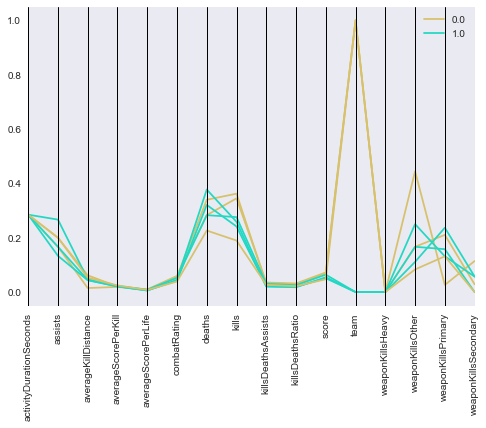

In [14]:
parallel_coordinates(testdf, 'standing')
plt.xticks(rotation=90)

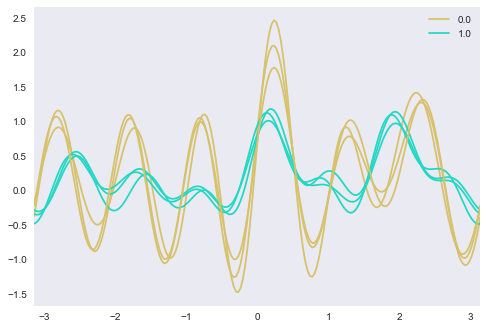

In [15]:
andrews_curves(testdf, "standing")

In [16]:
df2 = normalize(df)
df2 = df2[6:12]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

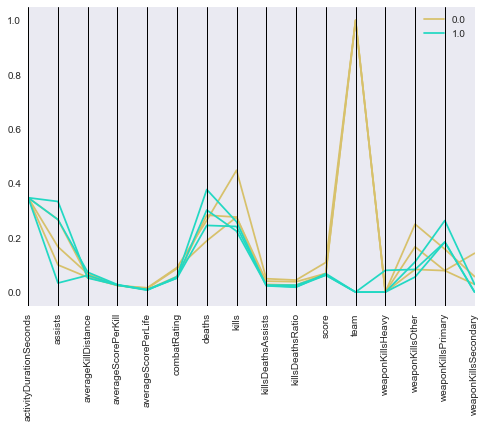

In [17]:
parallel_coordinates(df2, "standing")
plt.xticks(rotation=90)

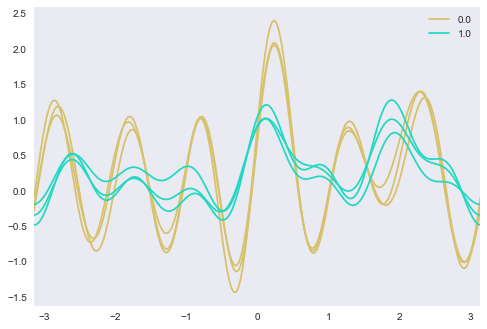

In [18]:
andrews_curves(df2, "standing")